# 🗑️ YOLO11 Garbage Classification Project
A comprehensive machine learning pipeline for detecting and classifying waste materials using YOLO11 (YOLOv11). This project focuses specifically on 5 key garbage categories for automated waste sorting and recycling optimization.

## 🎯 Project Overview

This project implements a complete machine learning pipeline for garbage classification using the latest YOLO11 architecture. The pipeline includes:

- Dataset preparation and preprocessing for waste management
- Model training with optimized configurations for garbage detection
- Comprehensive evaluation and visualization of classification performance
- Error analysis and recycling category performance metrics
- Production-ready inference capabilities for waste sorting

**Key Features:**
- Focus on 5 critical waste categories: cardboard, green-glass, paper, plastic, trash
- YOLO11 object detection architecture for efficient garbage classification
- Automated data preprocessing with image validation
- Comprehensive evaluation metrics (precision, recall, mAP, F1-score)
- Visual analysis tools for training monitoring
- Production-ready model export for waste sorting systems

**Target Applications:**
- Automated waste sorting facilities
- Smart recycling bins
- Environmental monitoring systems
- Waste management optimization
- Recycling classification assistance

**Dataset Categories:**
- **Cardboard**: Recyclable cardboard materials
- **Green-glass**: Glass containers and bottles
- **Paper**: Paper documents and packaging
- **Plastic**: Various plastic containers and materials
- **Trash**: General non-recyclable waste

**Technical Stack:**
- YOLO11 for state-of-the-art object detection
- PyTorch backend for deep learning
- Automated train/validation splitting
- Real-time training metrics visualization
- GPU acceleration support

In [ ]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install machine learning and image processing libraries




In [ ]:
!pip install datasets opencv-python scikit-learn pillow

In [ ]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

### 🔧 Initial Setup

Imports all required libraries and sets global parameters such as project paths, plot styles, and class mapping variables. This prepares the environment for training and evaluating the YOLO model.

In [ ]:
import os
import kagglehub
from ultralytics import YOLO
import shutil
import yaml
from pathlib import Path
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import json
from datetime import datetime
import torch
from tqdm import tqdm

# Configure matplotlib for displaying plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Global variables for the project
PROJECT_DIR = "yolo11_garbage"
DATASET_DIR = os.path.join(PROJECT_DIR, "dataset")
RESULTS_DIR = os.path.join(PROJECT_DIR, "results")
QUICK_TRAINING = False  # Set to False for full training

# Variables to be preserved across steps
class_mapping = {}
class_names = []

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Step 1: Initial Configuration

**Purpose:** Sets up the project directory structure and initializes the working environment.

**What it does:**
- Creates main project directory: `yolo11_garbage/`
- Sets up dataset subdirectories for images and labels
- Creates train/validation splits directories
- Initializes results directory for outputs

**Directory Structure Created:**
```
yolo11_garbage/
├── dataset/
│   ├── images/
│   │   ├── train/
│   │   └── val/
│   └── labels/
│       ├── train/
│       └── val/
└── results/
```

In [ ]:
# ============================================================================
# STEP 1: INITIAL SETUP
# ============================================================================
def initial_setup():

    # Create directory structure
    dirs_to_create = [
        DATASET_DIR,
        os.path.join(DATASET_DIR, "images", "train"),
        os.path.join(DATASET_DIR, "images", "val"),
        os.path.join(DATASET_DIR, "labels", "train"),
        os.path.join(DATASET_DIR, "labels", "val"),
        RESULTS_DIR
    ]

    for dir_path in dirs_to_create:
        os.makedirs(dir_path, exist_ok=True)

    print(f"📁 Directories created in: {PROJECT_DIR}")
    print("✅ Initial setup completed\n")
    return True

## Step 2: Dataset Download

**Purpose:** Downloads the dataset from Kaggle using the Kaggle API with dataset id.

**Dataset Details:**
- **Source:** Kaggle dataset
- **Content:** Images
- **Size:** Several GB of image data
- **Format:** JPG/PNG images

**What it does:**
- Downloads dataset using kagglehub
- Returns path to downloaded dataset
- Handles download errors gracefully

In [ ]:
# ============================================================================
# STEP 2: DOWNLOAD THE DATASET
# ============================================================================
def download_dataset(dataset_id):
    """Step 2: Download the dataset from Kaggle"""
    print("📥 STEP 2: DOWNLOAD THE DATASET")
    print("=" * 50)



    print("🔄 Downloading dataset...")
    try:
        path = kagglehub.dataset_download(dataset_id)
        print(f"✅ Dataset downloaded to: {path}")
        return path
    except Exception as e:
        print(f"❌ Error downloading dataset: {e}")
        return None

## Step 3: Dataset Exploration

**Purpose:** Analyzes the dataset structure and provides insights into the available data.

**What it does:**
- Walks through dataset directory structure
- Counts images in each category
- Identifies available garbage
- Provides statistical overview of the dataset

**Analysis Includes:**
- Total number of images
- Number of classes/categories
- Distribution of images per class
- File format verification
- Directory structure visualization

In [ ]:
# ============================================================================
# STEP 3: DATASET EXPLORATION
# ============================================================================
def explore_dataset(dataset_path):
    """Step 3: Explore the dataset structure"""
    print("🔍 STEP 3: DATASET EXPLORATION")
    print("=" * 50)

    if not dataset_path or not os.path.exists(dataset_path):
        print("❌ Invalid dataset path")
        return False

    print(f"📁 Dataset structure at: {dataset_path}")
    total_images = 0
    classes_found = []

    for root, dirs, files in os.walk(dataset_path):
        level = root.replace(dataset_path, '').count(os.sep)
        indent = ' ' * 2 * level
        folder_name = os.path.basename(root)
        print(f"{indent}{folder_name}/")

        # Count images
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        if image_files:
            total_images += len(image_files)
            subindent = ' ' * 2 * (level + 1)

            for file in image_files[:3]:
                print(f"{subindent}{file}")
            if len(image_files) > 3:
                print(f"{subindent}... and {len(image_files) - 3} more files")

        # Identify classes
        if level == 2:
            parent_folder = os.path.basename(os.path.dirname(root))
            class_name = f"{parent_folder}_{folder_name}"
            if class_name not in classes_found:
                classes_found.append(class_name)

    print(f"\n📊 Exploration summary:")
    print(f"  • Classes found: {len(classes_found)}")
    print(f"  • Total images: {total_images}")

    return True


## 🔄 Step 4: Prepare Data for YOLO

**Purpose:** Converts the raw garbage dataset into YOLO-compatible format for 5 selected waste categories.

**Key Features:**
- **Focus:** 5 specific garbage types for optimal performance
- **Format:** YOLO annotation format (class_id x_center y_center width height)
- **Split:** 80% training, 20% validation with stratified sampling
- **Cleanup:** Automatic removal of previous processed data

**What it does:**
- Filters dataset to process only target garbage categories
- Creates numerical class mapping from category names
- Generates YOLO-format annotations with full-image bounding boxes
- Validates image integrity and removes corrupted files
- Splits data maintaining class distribution balance
- Copies and systematically renames images
- Validates all class IDs are within valid range

**Class Mapping Example:**

```
0: cardboard
1: green-glass
2: paper
3: plastic
4: trash
```

In [ ]:
# ============================================================================
# STEP 4: PREPARE DATA FOR YOLO
# ============================================================================
def prepare_data_yolo(source_path, target_categories):
    """Step 4: Convert dataset to YOLO format - 5 SELECTED GARBAGE CATEGORIES"""
    global class_mapping, class_names
    print("🔄 STEP 4: PREPARING DATA FOR YOLO - 5 SELECTED GARBAGE CATEGORIES")
    print("=" * 50)
    if not source_path or not os.path.exists(source_path):
        print("❌ Invalid dataset path")
        return False, 0, 0

    # CLEAN directories before processing
    print("🧹 Cleaning previous directories...")
    for split in ['train', 'val']:
        images_dir = os.path.join(DATASET_DIR, "images", split)
        labels_dir = os.path.join(DATASET_DIR, "labels", split)
        for file_path in glob.glob(os.path.join(images_dir, "*")):
            os.remove(file_path)
        for file_path in glob.glob(os.path.join(labels_dir, "*")):
            os.remove(file_path)

    classes = []
    image_paths = []

    # Find the actual data directory (could be nested)
    actual_data_path = source_path
    if os.path.exists(os.path.join(source_path, "garbage_classification")):
        actual_data_path = os.path.join(source_path, "garbage_classification")

    # Define specific categories to process

    # Get only the target garbage categories (folders)
    garbage_categories = []
    for item in os.listdir(actual_data_path):
        item_path = os.path.join(actual_data_path, item)
        if os.path.isdir(item_path) and item in target_categories:
            garbage_categories.append(item)

    if not garbage_categories:
        print("❌ Target garbage categories not found")
        print(f"Looking for: {target_categories}")
        print("Available folders:")
        for item in os.listdir(actual_data_path):
            item_path = os.path.join(actual_data_path, item)
            if os.path.isdir(item_path):
                print(f"  - {item}")
        return False, 0, 0

    print(f"📂 Processing selected garbage categories: {sorted(garbage_categories)}")
    print(f"📋 Target categories: {target_categories}")

    # Process each garbage category
    for category in garbage_categories:
        category_path = os.path.join(actual_data_path, category)
        class_name = category  # Use category name directly

        if class_name not in classes:
            classes.append(class_name)

        # Search for images in this category folder
        image_count = 0
        extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.JPG', '*.JPEG', '*.PNG', '*.BMP']

        for ext in extensions:
            images = glob.glob(os.path.join(category_path, ext))
            for img_path in images:
                if os.path.isfile(img_path):
                    try:
                        with Image.open(img_path) as img:
                            img.verify()
                        image_paths.append((img_path, class_name))
                        image_count += 1
                    except Exception:
                        print(f"⚠️  Corrupted image ignored: {img_path}")

        print(f"    🗑️  {category}: {image_count} images")

    if len(image_paths) == 0:
        print("❌ No valid garbage images found.")
        return False, 0, 0

    # Create class mapping for garbage categories
    class_names = sorted(classes)
    class_mapping = {cls: idx for idx, cls in enumerate(class_names)}

    print(f"\n📊 Dataset summary (5 selected garbage categories):")
    print(f"  • Selected categories: {target_categories}")
    print(f"  • Total classes: {len(class_names)}")
    print(f"  • Classes found:")
    for i, cls in enumerate(class_names):
        print(f"    {i}: {cls}")
    print(f"  • Total images: {len(image_paths)}")

    from collections import Counter
    class_distribution = Counter([x[1] for x in image_paths])
    print(f"  • Class distribution:")
    for cls, count in class_distribution.items():
        print(f"    {cls}: {count} images")

    # Split into train/val - ensure at least one image per class in each split
    try:
        train_data, val_data = train_test_split(
            image_paths,
            test_size=0.2,
            random_state=42,
            stratify=[x[1] for x in image_paths]
        )
    except ValueError as e:
        print(f"⚠️  Stratify error: {e}")
        print("  Using simple split without stratification")
        train_data, val_data = train_test_split(
            image_paths,
            test_size=0.2,
            random_state=42
        )

    # Process splits
    print(f"\n🔄 Processing data...")
    train_count = process_data_split(train_data, "train")
    val_count = process_data_split(val_data, "val")

    print(f"  ✅ Train: {train_count} images processed")
    print(f"  ✅ Val: {val_count} images processed")

    # Check that files were created correctly
    train_images = len(glob.glob(os.path.join(DATASET_DIR, "images", "train", "*.jpg")))
    val_images = len(glob.glob(os.path.join(DATASET_DIR, "images", "val", "*.jpg")))
    train_labels = len(glob.glob(os.path.join(DATASET_DIR, "labels", "train", "*.txt")))
    val_labels = len(glob.glob(os.path.join(DATASET_DIR, "labels", "val", "*.txt")))

    print(f"  📁 Files created:")
    print(f"    Train: {train_images} images, {train_labels} labels")
    print(f"    Val: {val_images} images, {val_labels} labels")

    # FINAL CHECK: Ensure all labels use valid classes
    print(f"\n🔍 Checking labels...")
    max_class_found = check_valid_labels()
    print(f"  • Maximum class found in labels: {max_class_found}")
    print(f"  • Valid classes: 0–{len(class_names) - 1}")

    if max_class_found >= len(class_names):
        print(f"❌ ERROR: Labels contain invalid class IDs!")
        return False, 0, 0

    return True, train_count, val_count

def check_valid_labels():
    """Helper function to check that all labels use valid class IDs"""
    max_class = -1
    for split in ['train', 'val']:
        labels_dir = os.path.join(DATASET_DIR, "labels", split)
        label_files = glob.glob(os.path.join(labels_dir, "*.txt"))

        for label_file in label_files:
            try:
                with open(label_file, 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if parts:
                            class_id = int(parts[0])
                            max_class = max(max_class, class_id)
            except Exception as e:
                print(f"⚠️  Error reading {label_file}: {e}")

    return max_class

def process_data_split(data, split_name):
    """Helper function to process a data split"""
    processed = 0
    for img_path, class_name in tqdm(data):
        try:
            if class_name not in class_mapping:
                print(f"⚠️  Class not found in mapping: {class_name}")
                continue

            base_name = os.path.splitext(os.path.basename(img_path))[0]
            img_name = f"{class_name}_{base_name}.jpg"
            dest_img_path = os.path.join(DATASET_DIR, "images", split_name, img_name)

            # Copy image
            shutil.copy2(img_path, dest_img_path)

            # Create YOLO annotation
            img = cv2.imread(img_path)
            if img is not None:
                class_id = class_mapping[class_name]
                if class_id >= len(class_names):
                    print(f"❌ ERROR: Invalid class_id {class_id} for {class_name}")
                    continue

                label_name = f"{class_name}_{base_name}.txt"
                label_path = os.path.join(DATASET_DIR, "labels", split_name, label_name)

                with open(label_path, 'w') as f:
                    # YOLO format: class_id x_center y_center width height (normalized)
                    f.write(f"{class_id} 0.5 0.5 1.0 1.0\n")

                processed += 1

        except Exception as e:
            print(f"⚠️  Error processing {img_path}: {e}")

    return processed

## 📝 Step 5: Create Configuration File

This step generates the YAML configuration file required for YOLO training:

- **Dataset paths**: Defines absolute paths to training and validation image directories
- **Class configuration**: Sets number of classes and class names from previous steps
- **YAML format**: Creates properly formatted configuration file for YOLO11
- **Validation**: Ensures class names are available before creating config
- **Output location**: Saves configuration as `garbage_config.yaml` in project directory

**Requirements**: Must run Step 4 (class extraction) first  
**Output**: YAML config file with dataset paths and class definitions

In [ ]:
# ============================================================================
# STEP 5: CREATE CONFIGURATION FILE
# ============================================================================
def create_config_file():
    """Step 5: Create YAML configuration file"""
    print("📝 STEP 5: CREATE YAML CONFIGURATION FILE")
    print("=" * 50)

    if not class_names:
        print("❌ No classes defined. Please run Step 4 first.")
        return None

    config_data = {
        'path': os.path.abspath(DATASET_DIR),
        'train': 'images/train',
        'val': 'images/val',
        'nc': len(class_names),
        'names': class_names
    }

    config_path = os.path.join(PROJECT_DIR, 'garbage_config.yaml')
    with open(config_path, 'w') as f:
        yaml.dump(config_data, f, default_flow_style=False)

    print(f"✅ Configuration saved at: {config_path}")
    print(f"  • Number of classes: {len(class_names)}")
    print(f"  • Classes: {', '.join(class_names[:5])}{'...' if len(class_names) > 5 else ''}")

    return config_path

## Step 6: Class Distribution Analysis

**Purpose:** Creates visualizations showing the distribution of classes in training and validation sets.

**What it does:**
- Counts images per class in both splits
- Creates bar chart visualization
- Identifies potential class imbalance issues
- Saves distribution plot as PNG

**Visualization Features:**
- Side-by-side bars for train/validation
- Color-coded bars
- Rotated labels for readability
- Grid for better visualization
- Statistical summary

In [ ]:
# ============================================================================
# STEP 6: CLASS DISTRIBUTION ANALYSIS
# ============================================================================
def analyze_class_distribution():
    """Step 6: Create class distribution chart"""
    print("📊 STEP 6: CLASS DISTRIBUTION ANALYSIS")
    print("=" * 50)

    if not class_names:
        print("❌ No classes defined. Please run Step 4 first.")
        return False

    train_dir = os.path.join(DATASET_DIR, "images", "train")
    val_dir = os.path.join(DATASET_DIR, "images", "val")

    # Valid image extensions
    valid_exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

    # Count images per class
    class_counts_train = {}
    class_counts_val = {}

    for class_name in class_names:
        # Count train images
        train_files = glob.glob(os.path.join(train_dir, f"{class_name}_*"))
        train_count = sum(1 for f in train_files if f.lower().endswith(valid_exts))

        # Count validation images
        val_files = glob.glob(os.path.join(val_dir, f"{class_name}_*"))
        val_count = sum(1 for f in val_files if f.lower().endswith(valid_exts))

        class_counts_train[class_name] = train_count
        class_counts_val[class_name] = val_count

    # Create plot
    fig, ax = plt.subplots(figsize=(15, 8))

    x = np.arange(len(class_names))
    width = 0.35

    train_counts = [class_counts_train[cls] for cls in class_names]
    val_counts = [class_counts_val[cls] for cls in class_names]

    ax.bar(x - width/2, train_counts, width, label='Train', alpha=0.8)
    ax.bar(x + width/2, val_counts, width, label='Validation', alpha=0.8)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Number of Images')
    ax.set_title('Class Distribution in Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()

    # Save plot
    dist_plot_path = os.path.join(RESULTS_DIR, 'class_distribution.png')
    plt.savefig(dist_plot_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"📊 Class distribution plot saved at: {dist_plot_path}")
    return True


## Step 7: Model Training

Trains the YOLO11 model with automatic cleanup of previous `results.csv` file.

**Configuration**:
- Quick training: 3 epochs, 416px
- Full training: 15 epochs, 640px
- Optimizer: SGD (lr=0.01)
- Saves model to `weights/best.pt`

In [ ]:
# ============================================================================
# STEP 7: MODEL TRAINING
# ============================================================================
def clean_results_csv():
    """Clean previous results.csv file"""
    results_csv_path = os.path.join(PROJECT_DIR, 'garbage_detection', 'results.csv')

    if os.path.exists(results_csv_path):
        try:
            os.remove(results_csv_path)
            print(f"🧹 Cleaned previous results.csv")
        except Exception as e:
            print(f"⚠️  Could not remove results.csv: {e}")
    else:
        print("🧹 No previous results.csv found")

def train_model(config_path):
    """Step 7: Train the YOLO11 model"""
    print("🚀 STEP 7: MODEL TRAINING")
    print("=" * 50)

    if not config_path or not os.path.exists(config_path):
        print("❌ Configuration file not found")
        return None, None

    # Clean previous results.csv before training
    clean_results_csv()

    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"  • Device: {device}")

    if device == 'cuda':
        print(f"  • GPU: {torch.cuda.get_device_name(0)}")
        print(f"  • GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

    # Load model
    model = YOLO('yolo11n.pt')

    # Training parameters
    if QUICK_TRAINING:
        epochs, imgsz, batch = 3, 416, 8 if device == 'cuda' else 4
        print("  • Mode: Quick training (3 epochs)")
    else:
        epochs, imgsz, batch = 15, 640, 16 if device == 'cuda' else 8
        print("  • Mode: Full training (15 epochs)")

    training_params = {
        'data': config_path,
        'epochs': epochs,
        'imgsz': imgsz,
        'batch': batch,
        'workers': 4 if device == 'cuda' else 2,
        'patience': 20,
        'save_period': 10,
        'cache': True,
        'device': device,
        'project': PROJECT_DIR,
        'name': 'garbage_detection',
        'exist_ok': True,
        'pretrained': True,
        'optimizer': 'SGD',
        'lr0': 0.01,
        'plots': True,
        'save_json': True,
    }

    print(f"  • Batch size: {batch}")
    print(f"  • Image size: {imgsz}px")
    print(f"  • Epochs: {epochs}")

    # Train
    print("🔄 Starting training...")
    results = model.train(**training_params)

    model_path = os.path.join(PROJECT_DIR, 'garbage_detection', 'weights', 'best.pt')
    print(f"✅ Training complete! Model saved at: {model_path}")

    return model, model_path

## Step 8: Training Metrics Visualization

**Purpose:** Creates comprehensive visualizations of training metrics and performance.

**Metrics Visualized:**
1. **Box Loss:** Training and validation bounding box loss
2. **Classification Loss:** Training and validation classification loss
3. **Precision:** Model precision over epochs
4. **Recall:** Model recall over epochs
5. **mAP@0.5:** Mean Average Precision at IoU threshold 0.5
6. **F1 Score:** Calculated F1 score over epochs

**Visualization Features:**
- 2x3 subplot layout
- Color-coded train/validation curves
- Grid for better readability
- Legends and proper labeling
- High-resolution output (300 DPI)

In [ ]:
# ============================================================================
# STEP 8: VISUALIZE TRAINING METRICS
# ============================================================================
def visualize_training_metrics():
    """Step 8: Visualize training metrics"""
    print("📈 STEP 8: VISUALIZE TRAINING METRICS")
    print("=" * 50)

    results_path = os.path.join(PROJECT_DIR, 'garbage_detection', 'results.csv')

    if not os.path.exists(results_path):
        print("⚠️  Training metrics file not found")
        return False

    # Read metrics
    df = pd.read_csv(results_path)
    df.columns = df.columns.str.strip()

    # Clean data: remove NaN values and sort by epoch
    df = df.dropna(subset=['epoch'])
    df = df.sort_values('epoch').reset_index(drop=True)

    # Ensure epoch column is numeric
    df['epoch'] = pd.to_numeric(df['epoch'], errors='coerce')
    df = df.dropna(subset=['epoch'])

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('YOLO11 Training Metrics - Garbage Classification', fontsize=16)

    # Helper function to plot metrics safely
    def safe_plot(ax, x_data, y_data, label, color, title):
        # Remove NaN values from both x and y
        mask = ~(pd.isna(x_data) | pd.isna(y_data))
        if mask.sum() > 0:  # Only plot if we have valid data
            x_clean = x_data[mask]
            y_clean = y_data[mask]
            ax.plot(x_clean, y_clean, label=label, color=color, marker='o', markersize=3)
        ax.set_title(title)
        ax.set_xlabel('Epoch')
        ax.legend()
        ax.grid(True, alpha=0.3)

    # Box Loss
    if 'train/box_loss' in df.columns and 'val/box_loss' in df.columns:
        safe_plot(axes[0, 0], df['epoch'], df['train/box_loss'], 'Train Box Loss', 'blue', 'Box Loss')
        safe_plot(axes[0, 0], df['epoch'], df['val/box_loss'], 'Val Box Loss', 'red', 'Box Loss')
        axes[0, 0].set_ylabel('Loss')
    elif 'train/box_loss' in df.columns:
        safe_plot(axes[0, 0], df['epoch'], df['train/box_loss'], 'Train Box Loss', 'blue', 'Box Loss')
        axes[0, 0].set_ylabel('Loss')

    # Classification Loss
    if 'train/cls_loss' in df.columns and 'val/cls_loss' in df.columns:
        safe_plot(axes[0, 1], df['epoch'], df['train/cls_loss'], 'Train Cls Loss', 'blue', 'Classification Loss')
        safe_plot(axes[0, 1], df['epoch'], df['val/cls_loss'], 'Val Cls Loss', 'red', 'Classification Loss')
        axes[0, 1].set_ylabel('Loss')
    elif 'train/cls_loss' in df.columns:
        safe_plot(axes[0, 1], df['epoch'], df['train/cls_loss'], 'Train Cls Loss', 'blue', 'Classification Loss')
        axes[0, 1].set_ylabel('Loss')

    # Precision
    if 'metrics/precision(B)' in df.columns:
        safe_plot(axes[0, 2], df['epoch'], df['metrics/precision(B)'], 'Precision', 'green', 'Precision')
        axes[0, 2].set_ylabel('Precision')

    # Recall
    if 'metrics/recall(B)' in df.columns:
        safe_plot(axes[1, 0], df['epoch'], df['metrics/recall(B)'], 'Recall', 'orange', 'Recall')
        axes[1, 0].set_ylabel('Recall')

    # mAP@50
    if 'metrics/mAP50(B)' in df.columns:
        safe_plot(axes[1, 1], df['epoch'], df['metrics/mAP50(B)'], 'mAP50', 'purple', 'mAP@0.5')
        axes[1, 1].set_ylabel('mAP')

    # F1 Score (calculated)
    if 'metrics/precision(B)' in df.columns and 'metrics/recall(B)' in df.columns:
        precision = pd.to_numeric(df['metrics/precision(B)'], errors='coerce')
        recall = pd.to_numeric(df['metrics/recall(B)'], errors='coerce')

        # Calculate F1 only for valid precision and recall values
        valid_mask = ~(pd.isna(precision) | pd.isna(recall)) & (precision > 0) & (recall > 0)
        if valid_mask.sum() > 0:
            f1 = pd.Series(index=df.index, dtype=float)
            f1[valid_mask] = 2 * (precision[valid_mask] * recall[valid_mask]) / (precision[valid_mask] + recall[valid_mask])

            safe_plot(axes[1, 2], df['epoch'], f1, 'F1 Score', 'red', 'F1 Score')
            axes[1, 2].set_ylabel('F1 Score')

    # Remove empty subplots
    for i in range(2):
        for j in range(3):
            if not axes[i, j].lines:  # If no lines were plotted
                axes[i, j].set_visible(False)

    plt.tight_layout()

    # Save plot
    metrics_plot_path = os.path.join(RESULTS_DIR, 'training_metrics.png')
    plt.savefig(metrics_plot_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"📊 Metric plots saved at: {metrics_plot_path}")

    # Show final metrics
    if len(df) > 0:
        final_metrics = df.iloc[-1]
        print(f"\n📈 Final metrics (Epoch {int(final_metrics['epoch'])}):")

        metrics_to_show = [
            ('Precision', 'metrics/precision(B)'),
            ('Recall', 'metrics/recall(B)'),
            ('mAP50', 'metrics/mAP50(B)'),
            ('mAP50-95', 'metrics/mAP50-95(B)')
        ]

        for name, col in metrics_to_show:
            if col in final_metrics and pd.notna(final_metrics[col]):
                print(f"  • {name}: {final_metrics[col]:.4f}")

    return True

## Step 9: Model Evaluation

**Purpose:** Performs comprehensive evaluation of the trained model on validation data.

**Evaluation Metrics:**
- **mAP@0.5:** Mean Average Precision at IoU 0.5
- **mAP@0.5:0.95:** Mean Average Precision across IoU thresholds
- **Precision:** Overall model precision
- **Recall:** Overall model recall

**What it does:**
- Loads trained model
- Runs validation on test set
- Calculates comprehensive metrics
- Generates evaluation plots
- Saves detailed results


In [ ]:
# ============================================================================
# STEP 9: MODEL EVALUATION
# ============================================================================
def evaluate_model(model_path, config_path):
    """Step 9: Evaluate the model and show detailed metrics"""
    print("🔍 STEP 9: MODEL EVALUATION")
    print("=" * 50)

    if not model_path or not os.path.exists(model_path):
        print("❌ Model not found")
        return None

    if not config_path or not os.path.exists(config_path):
        print("❌ Configuration not found")
        return None

    model = YOLO(model_path)
    results = model.val(data=config_path, plots=True, save_json=True)

    print(f"📊 Evaluation results:")
    print(f"  • mAP50: {results.box.map50:.4f}")
    print(f"  • mAP50-95: {results.box.map:.4f}")
    print(f"  • Precision: {results.box.mp:.4f}")
    print(f"  • Recall: {results.box.mr:.4f}")

    return results

## Step 10: Prediction Visualization

**Purpose:** Creates visual demonstrations of model predictions on sample images.

**What it does:**
- Selects sample images from validation set
- Runs inference on selected images
- Draws bounding boxes and labels
- Shows confidence scores
- Compares predictions with ground truth

**Visualization Features:**
- 2x3 grid of predicted images
- Bounding boxes with confidence scores
- Class labels and predictions
- True class labels for comparison
- High-quality output for presentation

In [ ]:
# ============================================================================
# STEP 10: PREDICTION VISUALIZATION
# ============================================================================
def visualize_predictions(model_path, sample_images=6):
    """Step 10: Create prediction visualizations"""
    print("🎨 STEP 10: PREDICTION VISUALIZATION")
    print("=" * 50)

    if not model_path or not os.path.exists(model_path):
        print("❌ Model not found")
        return False

    model = YOLO(model_path)

    # Get validation images
    val_images_dir = os.path.join(DATASET_DIR, "images", "val")
    image_files = glob.glob(os.path.join(val_images_dir, "*.jpg"))[:sample_images]

    if not image_files:
        print("⚠️  No validation images found")
        return False

    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('YOLO11 Model Predictions - Garbage Classification Detection', fontsize=16)

    axes = axes.flatten()

    for i, img_path in enumerate(image_files[:6]):
        if i >= len(axes):
            break

        # Make prediction
        results = model.predict(img_path, conf=0.5, verbose=False)

        # Load image
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Get predictions
        if len(results) > 0 and len(results[0].boxes) > 0:
            boxes = results[0].boxes
            for box in boxes:
                # Get box info
                class_id = int(box.cls[0])
                confidence = float(box.conf[0])
                class_name = class_names[class_id]

                # Draw on image
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Add label text
                label = f"{class_name}: {confidence:.2f}"
                (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
                cv2.rectangle(img_rgb, (x1, y1 - text_height - 10), (x1 + text_width, y1), (0, 255, 0), -1)
                cv2.putText(img_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Show image
        axes[i].imshow(img_rgb)
        axes[i].axis('off')

        # Extract true class name from filename
        filename = os.path.basename(img_path)
        true_class = filename.split('_')[0]
        axes[i].set_title(f'True: {true_class}', fontsize=10)

    plt.tight_layout()

    # Save visualization
    pred_plot_path = os.path.join(RESULTS_DIR, 'predictions_visualization.png')
    plt.savefig(pred_plot_path, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"🎨 Visualizations saved to: {pred_plot_path}")
    return True


## Step 11: Inference Demonstration

**Purpose:** Demonstrates real-time inference capabilities with detailed performance analysis.

**What it does:**
- Processes multiple test images
- Performs inference with confidence thresholding
- Compares predictions with ground truth
- Calculates accuracy metrics
- Generates detailed results summary

**Performance Metrics:**
- Overall accuracy percentage
- Average confidence scores
- Successful detection rate
- Detailed per-image results

In [ ]:
# ============================================================================
# STEP 11: INFERENCE DEMONSTRATION
# ============================================================================
def inference_demo(model_path):
    """Step 11: Interactive inference demonstration"""
    print("🎯 STEP 11: INFERENCE DEMONSTRATION")
    print("=" * 50)

    if not model_path or not os.path.exists(model_path):
        print("❌ Model not found")
        return None

    model = YOLO(model_path)

    # Get some validation images
    val_dir = os.path.join(DATASET_DIR, "images", "val")
    test_images = glob.glob(os.path.join(val_dir, "*.jpg"))[:10]

    if not test_images:
        print("⚠️  No images found for the demo")
        return None

    print(f"🖼️  Processing {len(test_images)} sample images...")

    results_summary = []

    for i, img_path in enumerate(test_images):
        filename = os.path.basename(img_path)
        true_class = filename.split('_')[0]
        # Perform prediction
        results = model.predict(img_path, conf=0.5, verbose=False)

        if len(results) > 0 and len(results[0].boxes) > 0:
            # Get best prediction
            best_box = results[0].boxes[0]
            predicted_class_id = int(best_box.cls[0])
            confidence = float(best_box.conf[0])
            predicted_class = class_names[predicted_class_id]

            # Check if correct
            is_correct = predicted_class == true_class
            status = "✅ CORRECT" if is_correct else "❌ INCORRECT"

            print(f"\n🖼️  Image {i+1}: {filename}")
            print(f"   📋 True class: {true_class}")
            print(f"   🎯 Prediction: {predicted_class} (confidence: {confidence:.3f})")
            print(f"   📊 Status: {status}")

            results_summary.append({
                'image': filename,
                'true_class': true_class,
                'prediction': predicted_class,
                'confidence': confidence,
                'correct': is_correct
            })
        else:
            print(f"\n🖼️  Image {i+1}: {filename}")
            print(f"   📋 True class: {true_class}")
            print(f"   ⚠️  No object detected")

            results_summary.append({
                'image': filename,
                'true_class': true_class,
                'prediction': 'Not detected',
                'confidence': 0.0,
                'correct': False
            })

    # Create DataFrame of results
    df_results = pd.DataFrame(results_summary)

    # Calculate statistics
    accuracy = df_results['correct'].mean()
    avg_confidence = df_results[df_results['confidence'] > 0]['confidence'].mean()

    print(f"\n📊 DEMONSTRATION SUMMARY:")
    print(f"   🎯 Accuracy: {accuracy:.1%} ({df_results['correct'].sum()}/{len(df_results)})")
    print(f"   📈 Average confidence: {avg_confidence:.3f}")
    print(f"   🔍 Successful detections: {len(df_results[df_results['confidence'] > 0])}/{len(df_results)}")

    # Save results
    results_csv_path = os.path.join(RESULTS_DIR, 'inference_demo_results.csv')
    df_results.to_csv(results_csv_path, index=False)
    print(f"   💾 Results saved at: {results_csv_path}")

    return df_results


## Step 12: Confusion Matrix

**Purpose:** Generates detailed confusion matrix and classification report.

**What it does:**
- Processes all validation images
- Creates confusion matrix
- Calculates per-class metrics
- Generates classification report
- Visualizes confusion matrix as heatmap

**Metrics Calculated:**
- Per-class precision, recall, F1-score
- Support (number of samples per class)
- Macro-averaged metrics
- Confusion matrix visualization

In [ ]:
# ============================================================================
# STEP 12: CONFUSION MATRIX
# ============================================================================
def build_confusion_matrix(model_path):
    """Step 12: Generate detailed confusion matrix"""
    print("📊 STEP 12: CONFUSION MATRIX")
    print("=" * 50)

    if not model_path or not os.path.exists(model_path):
        print("❌ Model not found")
        return False

    model = YOLO(model_path)

    # Get all validation images
    val_dir = os.path.join(DATASET_DIR, "images", "val")
    test_images = glob.glob(os.path.join(val_dir, "*.jpg"))

    if not test_images:
        print("⚠️  No validation images found")
        return False

    print(f"🔄 Processing {len(test_images)} images...")

    y_true = []
    y_pred = []

    for img_path in test_images:
        # Get true class from filename
        filename = os.path.basename(img_path)
        true_class = filename.split('_')[0]
        true_class_id = class_mapping.get(true_class, -1)

        if true_class_id == -1:
            continue

        # Perform prediction
        results = model.predict(img_path, conf=0.3, verbose=False)

        if len(results) > 0 and len(results[0].boxes) > 0:
            # Get best prediction
            best_box = results[0].boxes[0]
            predicted_class_id = int(best_box.cls[0])
        else:
            # If no detection, assign "unknown" class (-1)
            predicted_class_id = -1

        y_true.append(true_class_id)
        y_pred.append(predicted_class_id)

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_names))))

    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Number of Predictions'})
    plt.title('Confusion Matrix - Garbage Detection')
    plt.xlabel('Prediction')
    plt.ylabel('True Class')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Save plot
    cm_plot_path = os.path.join(RESULTS_DIR, 'confusion_matrix.png')
    plt.savefig(cm_plot_path, dpi=300, bbox_inches='tight')
    plt.show()

    # Calculate metrics per class
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true, y_pred, labels=list(range(len(class_names))), zero_division=0
    )

    # Classification report
    print(f"\n📈 CLASSIFICATION REPORT:")
    print("-" * 80)
    print(f"{'Class':<20} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
    print("-" * 80)

    for i, class_name in enumerate(class_names):
        print(f"{class_name:<20} {precision[i]:<10.3f} {recall[i]:<10.3f} {f1[i]:<10.3f} {support[i]:<10}")

    # Global metrics
    macro_avg_precision = np.mean(precision)
    macro_avg_recall = np.mean(recall)
    macro_avg_f1 = np.mean(f1)

    print("-" * 80)
    print(f"{'Macro Avg':<20} {macro_avg_precision:<10.3f} {macro_avg_recall:<10.3f} {macro_avg_f1:<10.3f} {sum(support):<10}")

    # Save report
    report_dict = classification_report(y_true, y_pred, target_names=class_names,
                                        labels=list(range(len(class_names))),
                                        zero_division=0, output_dict=True)

    report_path = os.path.join(RESULTS_DIR, 'classification_report.json')
    with open(report_path, 'w') as f:
        json.dump(report_dict, f, indent=2)

    print(f"\n💾 Confusion matrix saved at: {cm_plot_path}")
    print(f"💾 Classification report saved at: {report_path}")

    return True


## Step 13: Error Analysis

**Purpose:** Performs detailed analysis of model errors and failure cases.

**What it does:**
- Identifies all incorrect predictions
- Categorizes error types
- Analyzes confidence scores in errors
- Visualizes common failure cases
- Provides insights for model improvement

**Error Analysis Includes:**
- Most common error patterns
- Confidence analysis of wrong predictions
- Visual examples of failure cases
- Recommendations for improvement

In [ ]:
# ============================================================================
# STEP 13: ERROR ANALYSIS
# ============================================================================
def error_analysis(model_path):
    """Step 13: Detailed error analysis of the model for garbage classification"""
    print("🔍 STEP 13: ERROR ANALYSIS - GARBAGE CLASSIFICATION")
    print("=" * 50)

    if not model_path or not os.path.exists(model_path):
        print("❌ Model not found")
        return False

    model = YOLO(model_path)

    # Get validation images
    val_dir = os.path.join(DATASET_DIR, "images", "val")
    test_images = glob.glob(os.path.join(val_dir, "*.jpg"))

    if not test_images:
        print("❌ No validation images found")
        return False

    errors = []
    correct_predictions = []

    print(f"🔄 Analyzing {len(test_images)} predictions...")

    for img_path in tqdm(test_images, desc="Analyzing predictions"):
        filename = os.path.basename(img_path)

        # Extract true class from filename
        # Format: category_originalname.jpg (e.g., "plastic_plastic453.jpg")
        try:
            true_class = filename.split('_')[0]  # Get first part before underscore
        except:
            print(f"⚠️ Could not extract class from filename: {filename}")
            continue

        # Perform prediction
        try:
            results = model.predict(img_path, conf=0.3, verbose=False)

            if len(results) > 0 and len(results[0].boxes) > 0:
                best_box = results[0].boxes[0]
                predicted_class_id = int(best_box.cls[0])
                confidence = float(best_box.conf[0])

                # Make sure the predicted class ID is valid
                if predicted_class_id < len(class_names):
                    predicted_class = class_names[predicted_class_id]
                else:
                    predicted_class = f"Invalid_ID_{predicted_class_id}"

                prediction_data = {
                    'image': filename,
                    'path': img_path,
                    'true_class': true_class,
                    'prediction': predicted_class,
                    'confidence': confidence,
                    'correct': predicted_class == true_class
                }

                if predicted_class == true_class:
                    correct_predictions.append(prediction_data)
                else:
                    errors.append(prediction_data)
            else:
                # Nothing detected
                errors.append({
                    'image': filename,
                    'path': img_path,
                    'true_class': true_class,
                    'prediction': 'Not_detected',
                    'confidence': 0.0,
                    'correct': False
                })
        except Exception as e:
            print(f"⚠️ Error processing {filename}: {e}")
            errors.append({
                'image': filename,
                'path': img_path,
                'true_class': true_class,
                'prediction': 'Error_processing',
                'confidence': 0.0,
                'correct': False
            })

    total_predictions = len(correct_predictions) + len(errors)
    accuracy = len(correct_predictions) / total_predictions if total_predictions > 0 else 0

    print(f"\n📊 ERROR SUMMARY:")
    print(f"   ✅ Correct predictions: {len(correct_predictions)}")
    print(f"   ❌ Errors: {len(errors)}")
    print(f"   📈 Total predictions: {total_predictions}")
    print(f"   🎯 Accuracy: {accuracy:.1%}")

    if errors:
        # Analyze error types
        error_types = {}
        confidence_errors = []
        class_errors = {}

        for error in errors:
            # Count errors by type
            if error['prediction'] == 'Not_detected':
                error_type = f"{error['true_class']} -> Not detected"
            elif error['prediction'] == 'Error_processing':
                error_type = f"{error['true_class']} -> Processing error"
            else:
                error_type = f"{error['true_class']} -> {error['prediction']}"

            if error_type not in error_types:
                error_types[error_type] = 0
            error_types[error_type] += 1

            # Count errors by class
            true_class = error['true_class']
            if true_class not in class_errors:
                class_errors[true_class] = 0
            class_errors[true_class] += 1

            if error['confidence'] > 0:
                confidence_errors.append(error['confidence'])

        # Show most common errors
        print(f"\n🔍 MOST COMMON ERROR TYPES:")
        sorted_errors = sorted(error_types.items(), key=lambda x: x[1], reverse=True)
        for error_type, count in sorted_errors[:10]:
            percentage = (count / len(errors)) * 100
            print(f"   • {error_type}: {count} cases ({percentage:.1f}%)")

        # Show errors by class
        print(f"\n📋 ERRORS BY CLASS:")
        sorted_class_errors = sorted(class_errors.items(), key=lambda x: x[1], reverse=True)
        for class_name, count in sorted_class_errors:
            # Calculate total images for this class in validation
            class_total = sum(1 for pred in correct_predictions + errors if pred['true_class'] == class_name)
            error_rate = (count / class_total) * 100 if class_total > 0 else 0
            print(f"   • {class_name}: {count}/{class_total} errors ({error_rate:.1f}% error rate)")

        # Confidence analysis of errors
        if confidence_errors:
            avg_error_confidence = np.mean(confidence_errors)
            high_conf_errors = sum(1 for c in confidence_errors if c > 0.7)
            print(f"\n📈 CONFIDENCE ANALYSIS IN ERRORS:")
            print(f"   • Average confidence in errors: {avg_error_confidence:.3f}")
            print(f"   • High confidence errors (>0.7): {high_conf_errors}/{len(confidence_errors)} ({(high_conf_errors/len(confidence_errors)*100):.1f}%)")
            print(f"   • Confidence range: {min(confidence_errors):.3f} - {max(confidence_errors):.3f}")

        # Create confusion matrix data
        confusion_data = create_confusion_matrix_data(correct_predictions + errors)

        # Visualize some errors
        if len(errors) >= 6:
            visualize_errors(errors[:6])

    # Calculate per-class accuracy
    class_accuracy = calculate_per_class_accuracy(correct_predictions + errors)
    print(f"\n📊 PER-CLASS ACCURACY:")
    for class_name, acc_data in sorted(class_accuracy.items()):
        print(f"   • {class_name}: {acc_data['correct']}/{acc_data['total']} ({acc_data['accuracy']:.1%})")

    # Save analysis
    error_analysis_data = {
        'total_predictions': total_predictions,
        'correct_predictions': len(correct_predictions),
        'errors': len(errors),
        'accuracy': accuracy,
        'error_types': error_types,
        'class_errors': class_errors,
        'class_accuracy': class_accuracy,
        'avg_error_confidence': np.mean(confidence_errors) if confidence_errors else 0,
        'high_confidence_errors': sum(1 for c in confidence_errors if c > 0.7) if confidence_errors else 0
    }

    analysis_path = os.path.join(RESULTS_DIR, 'error_analysis.json')
    with open(analysis_path, 'w') as f:
        json.dump(error_analysis_data, f, indent=2)

    print(f"\n💾 Error analysis saved at: {analysis_path}")
    return True

def calculate_per_class_accuracy(all_predictions):
    """Calculate accuracy for each class"""
    class_stats = {}

    for pred in all_predictions:
        true_class = pred['true_class']
        if true_class not in class_stats:
            class_stats[true_class] = {'correct': 0, 'total': 0}

        class_stats[true_class]['total'] += 1
        if pred['correct']:
            class_stats[true_class]['correct'] += 1

    # Calculate accuracy percentages
    for class_name in class_stats:
        total = class_stats[class_name]['total']
        correct = class_stats[class_name]['correct']
        class_stats[class_name]['accuracy'] = correct / total if total > 0 else 0

    return class_stats

def create_confusion_matrix_data(all_predictions):
    """Create confusion matrix data"""
    from collections import defaultdict

    confusion = defaultdict(lambda: defaultdict(int))

    for pred in all_predictions:
        true_class = pred['true_class']
        predicted_class = pred['prediction']
        confusion[true_class][predicted_class] += 1

    return dict(confusion)

def visualize_errors(errors_sample):
    """Helper function to visualize errors"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Error Analysis - Incorrect Predictions (Garbage Classification)', fontsize=16)

    axes = axes.flatten()

    for i, error in enumerate(errors_sample):
        if i >= len(axes):
            break

        try:
            # Load and show image
            img = cv2.imread(error['path'])
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[i].imshow(img_rgb)
            else:
                # Create placeholder if image can't be loaded
                axes[i].text(0.5, 0.5, 'Image\nNot Found',
                           horizontalalignment='center', verticalalignment='center',
                           transform=axes[i].transAxes, fontsize=12)
        except Exception as e:
            axes[i].text(0.5, 0.5, f'Error\nLoading\nImage\n{str(e)[:20]}...',
                       horizontalalignment='center', verticalalignment='center',
                       transform=axes[i].transAxes, fontsize=10)

        axes[i].axis('off')

        # Title with error info
        title = f"True: {error['true_class']}\nPredicted: {error['prediction']}"
        if error['confidence'] > 0:
            title += f"\nConfidence: {error['confidence']:.3f}"

        axes[i].set_title(title, fontsize=10, color='red', pad=10)

    # Hide empty subplots
    for i in range(len(errors_sample), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()

    # Save error visualization
    try:
        errors_plot_path = os.path.join(RESULTS_DIR, 'error_analysis_visualization.png')
        plt.savefig(errors_plot_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"🎨 Error visualization saved at: {errors_plot_path}")
    except Exception as e:
        print(f"⚠️ Could not save error visualization: {e}")
        plt.show()

## Step 14: Final Report Generation

**Purpose:** Generates comprehensive final report with all project results and artifacts.

**Report Contents:**
- Project overview and configuration
- Final model metrics
- List of generated files
- Recommendations for next steps
- Complete project documentation

**Generated Files:**
- `reporte_final.md` - Markdown report
- `reporte_final.json` - Structured data report

In [ ]:
# ============================================================================
# STEP 14: FINAL REPORT AND CLEANUP
# ============================================================================
def final_report():
    """Step 14: Generate complete final report for garbage classification"""
    print("📋 STEP 14: FINAL REPORT - GARBAGE CLASSIFICATION")
    print("=" * 50)

    # Gather project information
    report_data = {
        'project': 'YOLO11 - Garbage Classification',
        'description': '5-Category Waste Classification System',
        'generation_date': datetime.now().isoformat(),
        'configuration': {
            'training_mode': 'Quick' if QUICK_TRAINING else 'Full',
            'total_classes': len(class_names),
            'classes': class_names,
            'target_categories': ['trash', 'plastic', 'green-glass', 'paper', 'cardboard']
        },
        'generated_files': [],
        'final_metrics': {},
        'dataset_info': {}
    }

    # Add dataset information
    try:
        # Count training and validation images
        train_dir = os.path.join(DATASET_DIR, "images", "train")
        val_dir = os.path.join(DATASET_DIR, "images", "val")

        train_count = len(glob.glob(os.path.join(train_dir, "*.jpg"))) if os.path.exists(train_dir) else 0
        val_count = len(glob.glob(os.path.join(val_dir, "*.jpg"))) if os.path.exists(val_dir) else 0

        report_data['dataset_info'] = {
            'total_images': train_count + val_count,
            'train_images': train_count,
            'val_images': val_count,
            'train_split': f"{(train_count/(train_count+val_count)*100):.1f}%" if (train_count+val_count) > 0 else "0%",
            'val_split': f"{(val_count/(train_count+val_count)*100):.1f}%" if (train_count+val_count) > 0 else "0%"
        }
    except Exception as e:
        print(f"⚠️ Could not gather dataset info: {e}")

    # Search for generated files
    if os.path.exists(RESULTS_DIR):
        for root, dirs, files in os.walk(RESULTS_DIR):
            for file in files:
                file_path = os.path.join(root, file)
                relative_path = os.path.relpath(file_path, PROJECT_DIR)
                report_data['generated_files'].append(relative_path)

    # Try to read final metrics from multiple possible locations
    results_found = False
    possible_results_paths = [
        os.path.join(PROJECT_DIR, 'garbage_classification', 'results.csv'),
        os.path.join(PROJECT_DIR, 'runs', 'detect', 'train', 'results.csv'),
        os.path.join(RESULTS_DIR, 'results.csv')
    ]

    for results_csv in possible_results_paths:
        try:
            if os.path.exists(results_csv):
                df = pd.read_csv(results_csv)
                if len(df) > 0:
                    final_row = df.iloc[-1]
                    report_data['final_metrics'] = {
                        'final_epoch': int(final_row.get('epoch', 0)),
                        'map50': float(final_row.get('metrics/mAP50(B)', 0)),
                        'map50_95': float(final_row.get('metrics/mAP50-95(B)', 0)),
                        'precision': float(final_row.get('metrics/precision(B)', 0)),
                        'recall': float(final_row.get('metrics/recall(B)', 0)),
                        'train_loss': float(final_row.get('train/box_loss', 0)),
                        'val_loss': float(final_row.get('val/box_loss', 0))
                    }
                    results_found = True
                    print(f"✅ Metrics loaded from: {results_csv}")
                    break
        except Exception as e:
            continue

    if not results_found:
        print("⚠️ Could not load final metrics from any location")

    # Try to load error analysis if available
    error_analysis_path = os.path.join(RESULTS_DIR, 'error_analysis.json')
    if os.path.exists(error_analysis_path):
        try:
            with open(error_analysis_path, 'r') as f:
                error_data = json.load(f)
                report_data['error_analysis'] = {
                    'accuracy': error_data.get('accuracy', 0),
                    'total_predictions': error_data.get('total_predictions', 0),
                    'errors': error_data.get('errors', 0),
                    'avg_error_confidence': error_data.get('avg_error_confidence', 0)
                }
        except Exception as e:
            print(f"⚠️ Could not load error analysis: {e}")

    # Create comprehensive Markdown report
    markdown_report = f"""# 🗑️ YOLO11 Project - Garbage Classification System

## 📊 Project Overview
- **Project Name**: {report_data['project']}
- **Description**: {report_data['description']}
- **Generation Date**: {report_data['generation_date'][:19]}
- **Training Mode**: {report_data['configuration']['training_mode']}
- **Total Classes**: {report_data['configuration']['total_classes']}

## 🎯 Target Categories
This model classifies waste into the following categories:
{chr(10).join([f'- **{cls}**: Recyclable waste category' for cls in report_data['configuration']['classes']])}

## 📈 Dataset Information
"""

    if report_data['dataset_info']:
        dataset = report_data['dataset_info']
        markdown_report += f"""- **Total Images**: {dataset['total_images']:,}
- **Training Images**: {dataset['train_images']:,} ({dataset['train_split']})
- **Validation Images**: {dataset['val_images']:,} ({dataset['val_split']})
- **Data Split**: {dataset['train_split']} train / {dataset['val_split']} validation
"""
    else:
        markdown_report += "Dataset information not available\n"

    markdown_report += "\n## 📊 Training Metrics\n"

    if report_data['final_metrics']:
        metrics = report_data['final_metrics']
        markdown_report += f"""- **Final Epoch**: {metrics['final_epoch']}
- **mAP@0.5**: {metrics['map50']:.4f} ({metrics['map50']*100:.1f}%)
- **mAP@0.5:0.95**: {metrics['map50_95']:.4f} ({metrics['map50_95']*100:.1f}%)
- **Precision**: {metrics['precision']:.4f} ({metrics['precision']*100:.1f}%)
- **Recall**: {metrics['recall']:.4f} ({metrics['recall']*100:.1f}%)
- **Training Loss**: {metrics.get('train_loss', 0):.4f}
- **Validation Loss**: {metrics.get('val_loss', 0):.4f}
"""
    else:
        markdown_report += "Training metrics not available\n"

    # Add error analysis if available
    if 'error_analysis' in report_data:
        error_data = report_data['error_analysis']
        markdown_report += f"""
## 🔍 Error Analysis
- **Overall Accuracy**: {error_data['accuracy']:.1%}
- **Total Predictions**: {error_data['total_predictions']:,}
- **Incorrect Predictions**: {error_data['errors']:,}
- **Average Confidence in Errors**: {error_data['avg_error_confidence']:.3f}
"""

    markdown_report += f"""
## 📁 Generated Files
{chr(10).join([f'- `{file}`' for file in sorted(report_data['generated_files'])])}

## 🌍 Environmental Impact
This garbage classification system can contribute to:
- **♻️ Improved Recycling**: Automatic sorting of recyclable materials
- **🌱 Waste Reduction**: Better waste management practices
- **📊 Data Collection**: Tracking waste generation patterns
- **🤖 Automation**: Reducing manual sorting labor

## 🚀 Deployment Recommendations

### For Production Use:
1. **Data Augmentation**: Add more diverse images per category
2. **Real-world Testing**: Test with various lighting conditions
3. **Edge Cases**: Handle mixed materials and contaminated items
4. **Performance Optimization**: Optimize for inference speed

### Integration Options:
- **Mobile App**: Real-time waste classification
- **Smart Bins**: Automated sorting systems
- **Web Interface**: Batch processing for waste facilities
- **IoT Integration**: Smart city waste management

## 📊 Performance Interpretation

### mAP Scores:
- **>0.9**: Excellent performance
- **0.7-0.9**: Good performance
- **0.5-0.7**: Moderate performance
- **<0.5**: Needs improvement

### Next Steps Based on Performance:
"""

    # Add performance-based recommendations
    if report_data['final_metrics']:
        map50 = report_data['final_metrics']['map50']
        if map50 > 0.9:
            markdown_report += "- ✅ **Excellent**: Ready for production deployment\n"
        elif map50 > 0.7:
            markdown_report += "- ✅ **Good**: Consider additional validation before deployment\n"
        elif map50 > 0.5:
            markdown_report += "- ⚠️ **Moderate**: Increase training data and epochs\n"
        else:
            markdown_report += "- ❌ **Needs Improvement**: Review data quality and model architecture\n"

    markdown_report += """
## 🔧 Technical Specifications
- **Framework**: YOLO11 (Ultralytics)
- **Task**: Object Detection/Classification
- **Input**: RGB Images
- **Output**: Class predictions with confidence scores
- **Format**: Standard YOLO format annotations

## 📝 Usage Notes
- This model is optimized for the 5 selected garbage categories
- Best performance on clear, well-lit images
- Consider preprocessing for optimal results
- Regular retraining recommended as new data becomes available

---
*Generated automatically by YOLO11 Garbage Classification Pipeline*
"""

    # Save reports
    report_md_path = os.path.join(RESULTS_DIR, 'final_report.md')
    with open(report_md_path, 'w', encoding='utf-8') as f:
        f.write(markdown_report)

    report_json_path = os.path.join(RESULTS_DIR, 'final_report.json')
    with open(report_json_path, 'w') as f:
        json.dump(report_data, f, indent=2, ensure_ascii=False)

    # Show final summary
    print("🎉 GARBAGE CLASSIFICATION PROJECT COMPLETED")
    print("=" * 50)
    print(f"📋 Final report generated:")
    print(f"   • Markdown: {report_md_path}")
    print(f"   • JSON: {report_json_path}")

    if report_data['final_metrics']:
        metrics = report_data['final_metrics']
        print(f"\n📊 Final model performance:")
        print(f"   • mAP@0.5: {metrics['map50']:.1%}")
        print(f"   • mAP@0.5:0.95: {metrics['map50_95']:.1%}")
        print(f"   • Precision: {metrics['precision']:.1%}")
        print(f"   • Recall: {metrics['recall']:.1%}")

        # Performance assessment
        if metrics['map50'] > 0.8:
            print(f"   🎯 Status: EXCELLENT - Ready for deployment!")
        elif metrics['map50'] > 0.6:
            print(f"   ✅ Status: GOOD - Consider additional validation")
        elif metrics['map50'] > 0.4:
            print(f"   ⚠️ Status: MODERATE - More training recommended")
        else:
            print(f"   ❌ Status: NEEDS IMPROVEMENT - Review data and parameters")

    if 'error_analysis' in report_data:
        error_data = report_data['error_analysis']
        print(f"\n🔍 Error analysis:")
        print(f"   • Overall accuracy: {error_data['accuracy']:.1%}")
        print(f"   • Total predictions: {error_data['total_predictions']:,}")

    if report_data['dataset_info']:
        dataset = report_data['dataset_info']
        print(f"\n📊 Dataset summary:")
        print(f"   • Total images: {dataset['total_images']:,}")
        print(f"   • Classes: {len(class_names)} garbage categories")

    print(f"\n📁 All files are located at: {PROJECT_DIR}")
    print(f"🗑️ The garbage classification model is ready to help sort waste!")
    print(f"🌱 Contributing to a cleaner environment through AI! 🌍")

    return True

## 🚀 YOLO11 Garbage Detection Pipeline

This notebook provides a complete machine learning pipeline for garbage detection using YOLO11. You have two execution options:

### 📋 Option 1: Step-by-Step Execution
Execute each step individually for better control and understanding:

1. **Initial Setup** - Environment configuration
2. **Download Dataset** - Fetch training data
3. **Explore Dataset** - Data analysis and visualization
4. **Prepare Data** - Format data for YOLO training
5. **Create Configuration** - Set up model parameters
6. **Class Distribution Analysis** - Analyze data balance
7. **Train Model** - Train the YOLO11 model
8. **Visualize Training Metrics** - Monitor training progress
9. **Evaluate Model** - Test model performance
10. **Visualize Predictions** - See model predictions
11. **Inference Demo** - Real-time inference testing
12. **Confusion Matrix** - Detailed performance analysis
13. **Error Analysis** - Identify improvement areas
14. **Final Report** - Complete summary

Choose the method that best suits your workflow and learning preferences!

In [ ]:
# Step 1: Initial setup
initial_setup()

📁 Directories created in: yolo11_garbage
✅ Initial setup completed



True

In [ ]:
# Step 2: Download dataset
dataset_id = "mostafaabla/garbage-classification"
dataset_path = download_dataset(dataset_id)

📥 STEP 2: DOWNLOAD THE DATASET
🔄 Downloading dataset...
✅ Dataset downloaded to: /kaggle/input/garbage-classification


In [ ]:
# Step 3: Explore dataset
explore_dataset(dataset_path)

🔍 STEP 3: DATASET EXPLORATION
📁 Dataset structure at: /kaggle/input/garbage-classification
garbage-classification/
  garbage_classification/
    metal/
      metal375.jpg
      metal561.jpg
      metal341.jpg
      ... and 766 more files
    white-glass/
      white-glass455.jpg
      white-glass64.jpg
      white-glass621.jpg
      ... and 772 more files
    biological/
      biological507.jpg
      biological943.jpg
      biological930.jpg
      ... and 982 more files
    paper/
      paper934.jpg
      paper508.jpg
      paper907.jpg
      ... and 1047 more files
    brown-glass/
      brown-glass577.jpg
      brown-glass13.jpg
      brown-glass148.jpg
      ... and 604 more files
    battery/
      battery161.jpg
      battery361.jpg
      battery405.jpg
      ... and 942 more files
    trash/
      trash625.jpg
      trash497.jpg
      trash225.jpg
      ... and 694 more files
    cardboard/
      cardboard112.jpg
      cardboard474.jpg
      cardboard578.jpg
      ... and 888 mor

True

In [ ]:
# Step 4: Prepare data
target_categories = ['trash', 'plastic', 'green-glass', 'paper', 'cardboard']

success, train_count, val_count = prepare_data_yolo(dataset_path, target_categories)
if not success:
    raise Exception("Data preparation failed")

🔄 STEP 4: PREPARING DATA FOR YOLO - 5 SELECTED GARBAGE CATEGORIES
🧹 Cleaning previous directories...
📂 Processing selected garbage categories: ['cardboard', 'green-glass', 'paper', 'plastic', 'trash']
📋 Target categories: ['trash', 'plastic', 'green-glass', 'paper', 'cardboard']
    🗑️  paper: 1050 images
    🗑️  trash: 697 images
    🗑️  cardboard: 891 images
    🗑️  plastic: 865 images
    🗑️  green-glass: 629 images

📊 Dataset summary (5 selected garbage categories):
  • Selected categories: ['trash', 'plastic', 'green-glass', 'paper', 'cardboard']
  • Total classes: 5
  • Classes found:
    0: cardboard
    1: green-glass
    2: paper
    3: plastic
    4: trash
  • Total images: 4132
  • Class distribution:
    paper: 1050 images
    trash: 697 images
    cardboard: 891 images
    plastic: 865 images
    green-glass: 629 images

🔄 Processing data...


100%|██████████| 827/827 [00:01<00:00, 504.72it/s]


  ✅ Train: 3305 images processed
  ✅ Val: 827 images processed
  📁 Files created:
    Train: 3305 images, 3305 labels
    Val: 827 images, 827 labels

🔍 Checking labels...
  • Maximum class found in labels: 4
  • Valid classes: 0–4


In [ ]:
# Step 5: Create configuration
config_path = create_config_file()
if not config_path:
    raise Exception("Config file creation failed")

📝 STEP 5: CREATE YAML CONFIGURATION FILE
✅ Configuration saved at: yolo11_garbage/garbage_config.yaml
  • Number of classes: 5
  • Classes: cardboard, green-glass, paper, plastic, trash


📊 STEP 6: CLASS DISTRIBUTION ANALYSIS


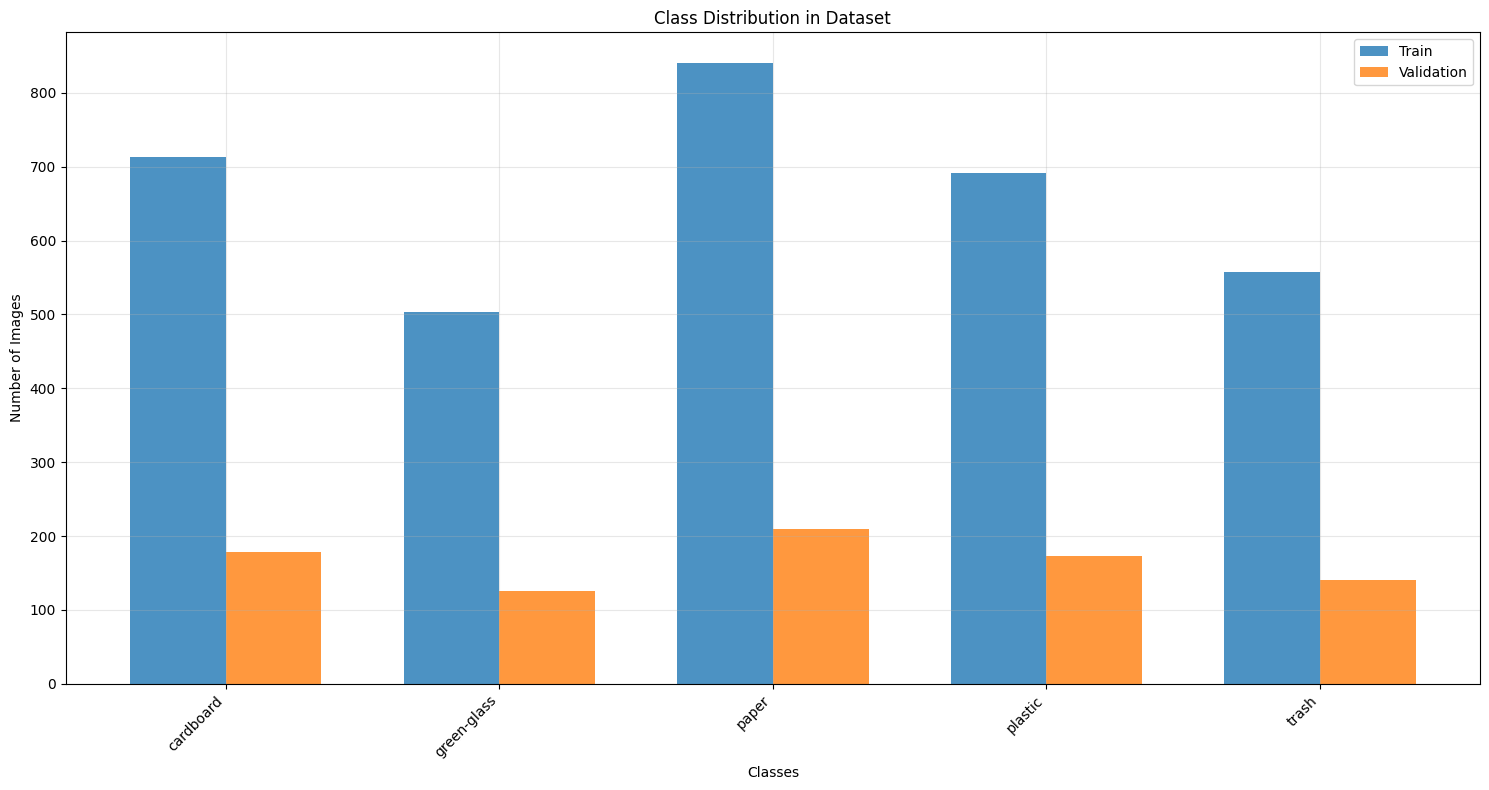

📊 Class distribution plot saved at: yolo11_garbage/results/class_distribution.png


True

In [ ]:
# Step 6: Class distribution analysis
analyze_class_distribution()

In [ ]:
# Step 7: Train model
model, model_path = train_model(config_path)
if not model or not model_path:
    raise Exception("Model training failed")

🚀 STEP 7: MODEL TRAINING
🧹 No previous results.csv found
  • Device: cuda
  • GPU: Tesla T4
  • GPU Memory: 14.7 GB


100%|██████████| 5.35M/5.35M [00:00<00:00, 94.1MB/s]


  • Mode: Full training (15 epochs)
  • Batch size: 16
  • Image size: 640px
  • Epochs: 15
🔄 Starting training...
Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo11_garbage/garbage_config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=garbage_detection, nbs=64, nms=False,

100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,815 parameters, 2,590,799 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 506.0±369.3 MB/s, size: 17.9 KB)


train: Scanning /content/yolo11_garbage/dataset/labels/train... 3305 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3305/3305 [00:01<00:00, 2416.90it/s]


train: New cache created: /content/yolo11_garbage/dataset/labels/train.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.9GB RAM): 100%|██████████| 3305/3305 [00:06<00:00, 531.55it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 351.7±384.0 MB/s, size: 17.0 KB)


val: Scanning /content/yolo11_garbage/dataset/labels/val... 827 images, 0 backgrounds, 0 corrupt: 100%|██████████| 827/827 [00:01<00:00, 752.48it/s]

val: New cache created: /content/yolo11_garbage/dataset/labels/val.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.7GB RAM): 100%|██████████| 827/827 [00:01<00:00, 507.58it/s]


Plotting labels to yolo11_garbage/garbage_detection/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolo11_garbage/garbage_detection
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.28G     0.3354      2.368      1.082         29        640: 100%|██████████| 207/207 [01:01<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.70it/s]

                   all        827        827      0.432      0.536      0.539      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.83G      0.241      1.229     0.9782         28        640: 100%|██████████| 207/207 [00:56<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.58it/s]

                   all        827        827      0.573      0.658      0.715      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.85G     0.2809      1.056     0.9918         29        640: 100%|██████████| 207/207 [00:54<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.26it/s]

                   all        827        827      0.586      0.683      0.708      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.86G     0.2991      1.038          1         24        640: 100%|██████████| 207/207 [00:55<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.23it/s]


                   all        827        827      0.603      0.606      0.696      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.86G     0.2712     0.9597     0.9827         31        640: 100%|██████████| 207/207 [00:56<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.66it/s]


                   all        827        827      0.763      0.744      0.806      0.798
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.87G     0.1669     0.9558     0.9356          9        640: 100%|██████████| 207/207 [00:55<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.56it/s]


                   all        827        827      0.568      0.742      0.714      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.88G     0.1335     0.7626     0.9145          9        640: 100%|██████████| 207/207 [00:54<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.71it/s]

                   all        827        827      0.708      0.828      0.859      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.89G     0.1122     0.6819     0.8978          9        640: 100%|██████████| 207/207 [00:53<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.52it/s]

                   all        827        827      0.768      0.731      0.852      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15       2.9G        0.1     0.5835     0.8883          9        640: 100%|██████████| 207/207 [00:57<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.86it/s]


                   all        827        827      0.784       0.65      0.803        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.91G    0.09144     0.5405     0.8839          9        640: 100%|██████████| 207/207 [00:54<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.62it/s]

                   all        827        827      0.921       0.87      0.955      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.92G    0.07785     0.4579     0.8823          9        640: 100%|██████████| 207/207 [00:54<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.69it/s]

                   all        827        827      0.798      0.747      0.893      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.93G    0.06793     0.4129     0.8737          9        640: 100%|██████████| 207/207 [00:54<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        827        827      0.855      0.866       0.94      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.94G    0.05696     0.3533     0.8739          9        640: 100%|██████████| 207/207 [00:53<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.75it/s]

                   all        827        827      0.849      0.838      0.937      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.95G    0.04729     0.3205      0.868          9        640: 100%|██████████| 207/207 [00:53<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]

                   all        827        827      0.923       0.93      0.973      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.96G    0.04092     0.2791     0.8645          9        640: 100%|██████████| 207/207 [00:54<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.70it/s]

                   all        827        827      0.945       0.93       0.98       0.98



15 epochs completed in 0.259 hours.
Optimizer stripped from yolo11_garbage/garbage_detection/weights/last.pt, 5.4MB
Optimizer stripped from yolo11_garbage/garbage_detection/weights/best.pt, 5.4MB

Validating yolo11_garbage/garbage_detection/weights/best.pt...
Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.94it/s]


                   all        827        827      0.945      0.929       0.98       0.98
             cardboard        178        178      0.965      0.933      0.983      0.983
           green-glass        126        126       0.94      0.991      0.991      0.991
                 paper        210        210      0.948      0.954      0.981      0.981
               plastic        173        173       0.88      0.884      0.958      0.958
                 trash        140        140      0.992      0.884      0.988      0.988
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Saving yolo11_garbage/garbage_detection/predictions.json...
Results saved to yolo11_garbage/garbage_detection
✅ Training complete! Model saved at: yolo11_garbage/garbage_detection/weights/best.pt


📈 STEP 8: VISUALIZE TRAINING METRICS


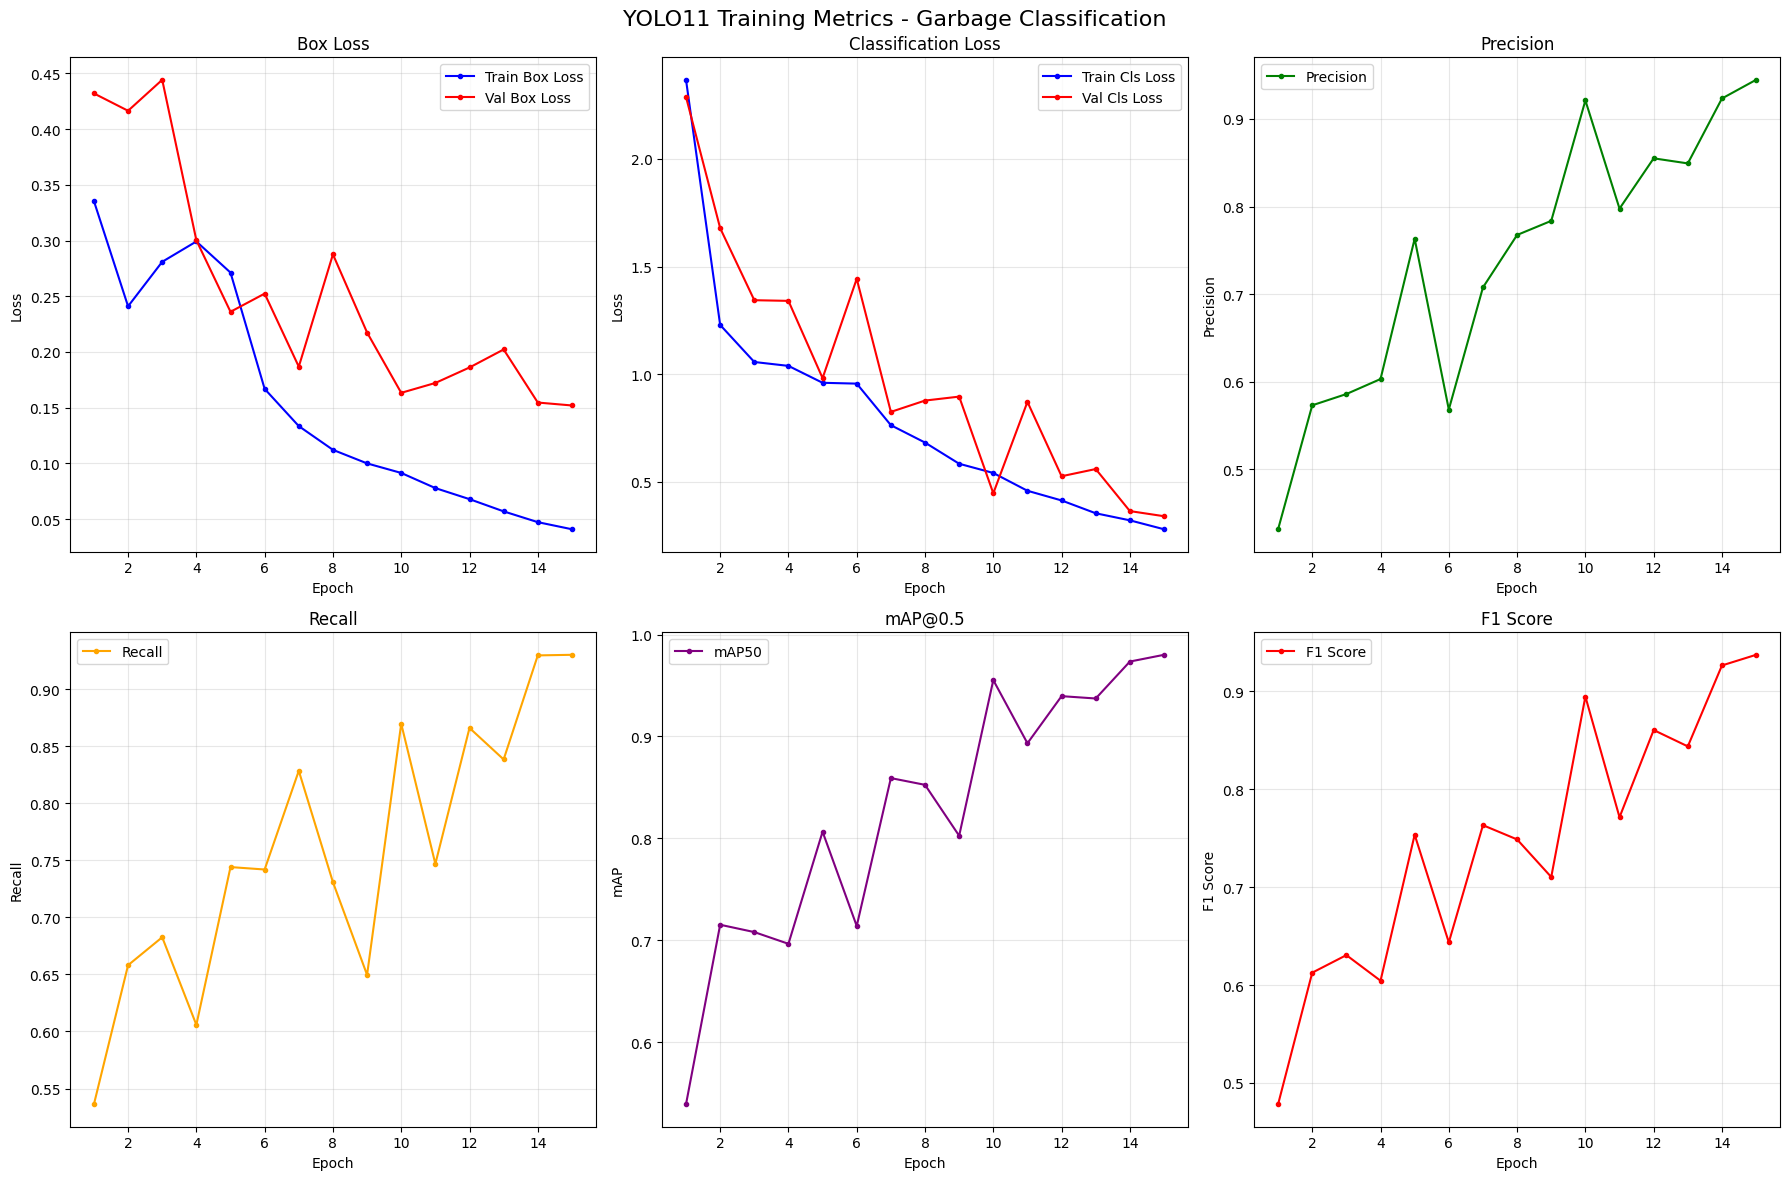

📊 Metric plots saved at: yolo11_garbage/results/training_metrics.png

📈 Final metrics (Epoch 15):
  • Precision: 0.9447
  • Recall: 0.9302
  • mAP50: 0.9801
  • mAP50-95: 0.9800


True

In [ ]:
# Step 8: Visualize training metrics
visualize_training_metrics()

In [ ]:
# Step 9: Evaluate model
evaluate_model(model_path, config_path)

🔍 STEP 9: MODEL EVALUATION
Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 376.9±402.0 MB/s, size: 11.5 KB)


val: Scanning /content/yolo11_garbage/dataset/labels/val.cache... 827 images, 0 backgrounds, 0 corrupt: 100%|██████████| 827/827 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:09<00:00,  5.52it/s]


                   all        827        827      0.935      0.933       0.98       0.98
             cardboard        178        178      0.954      0.932      0.985      0.985
           green-glass        126        126       0.94      0.992      0.992      0.991
                 paper        210        210      0.944      0.962      0.981      0.981
               plastic        173        173      0.863       0.89      0.958      0.958
                 trash        140        140      0.976      0.887      0.987      0.987
Speed: 0.6ms preprocess, 4.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val
📊 Evaluation results:
  • mAP50: 0.9803
  • mAP50-95: 0.9803
  • Precision: 0.9354
  • Recall: 0.9326


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bdde534a690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

🎨 STEP 10: PREDICTION VISUALIZATION


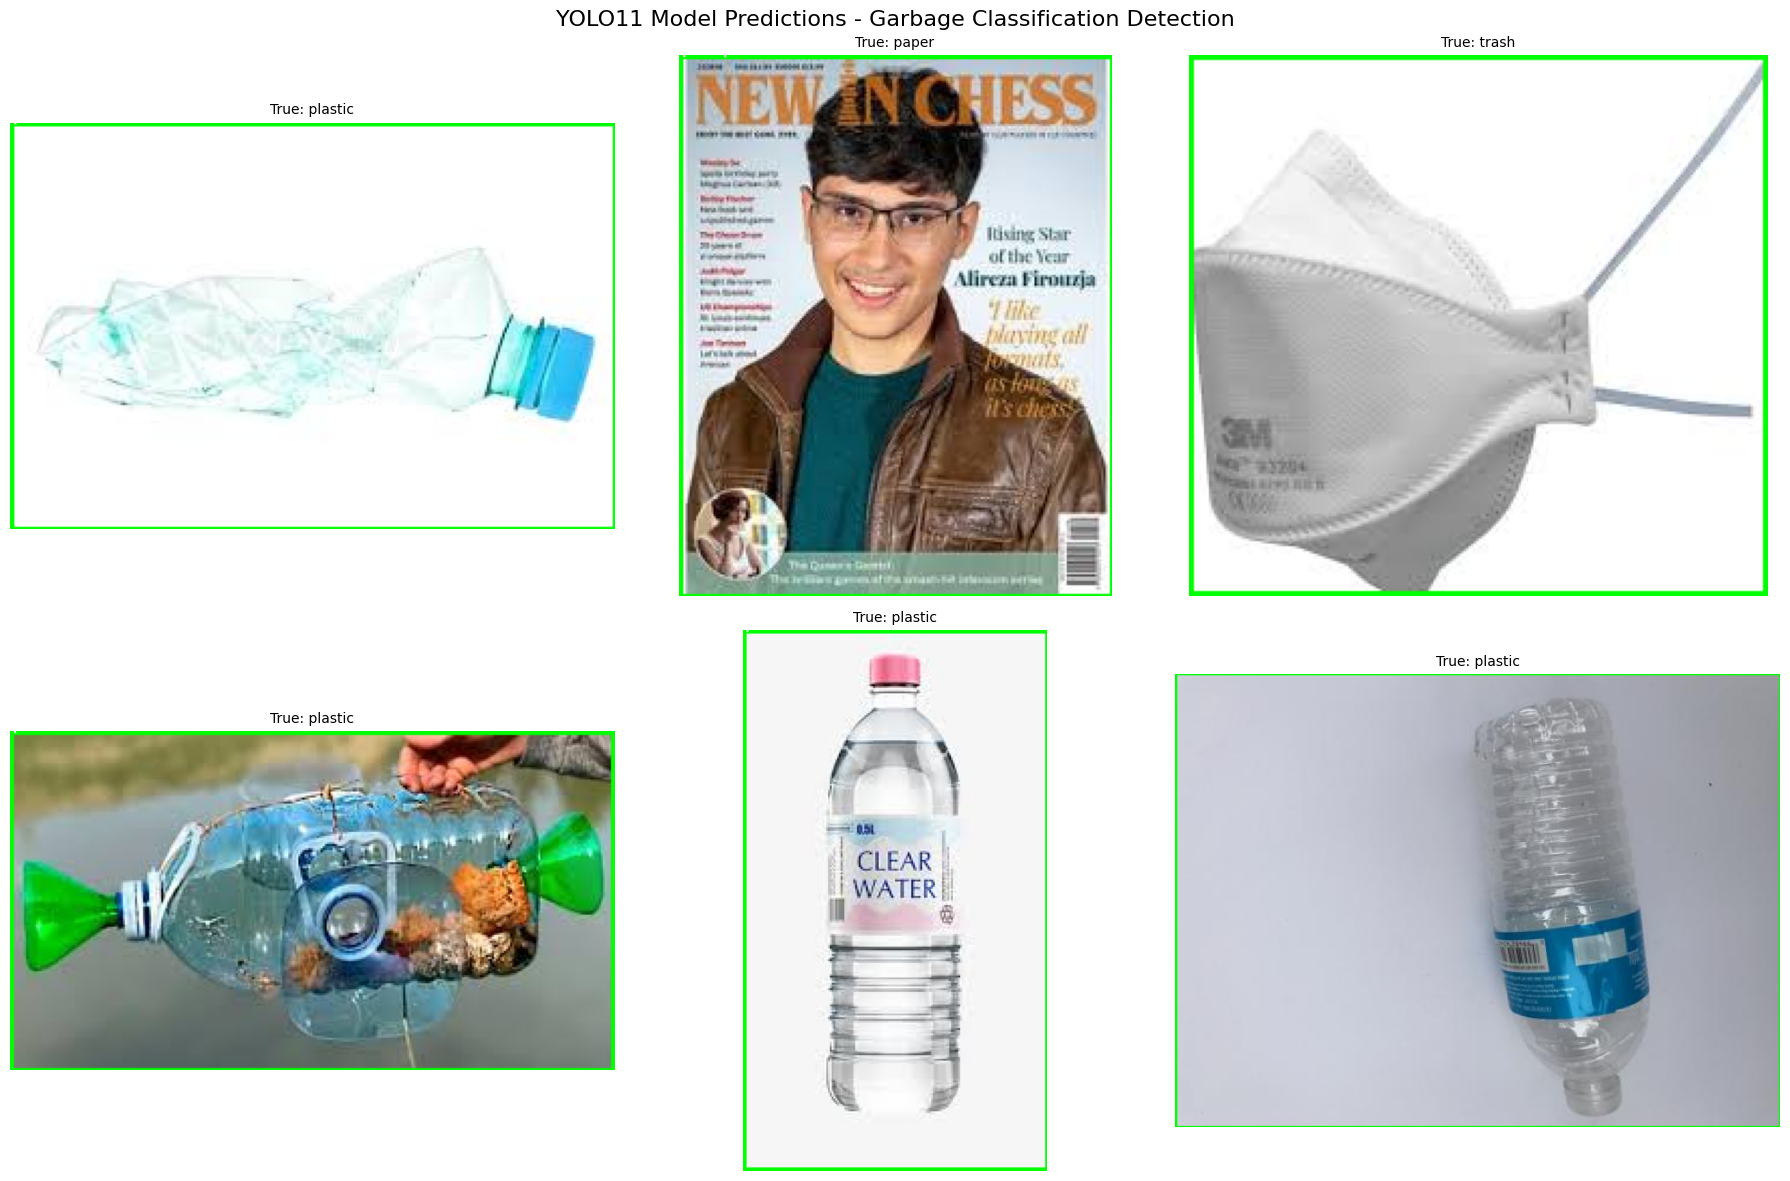

🎨 Visualizations saved to: yolo11_garbage/results/predictions_visualization.png


True

In [ ]:
# Step 10: Visualize predictions
visualize_predictions(model_path)

In [ ]:
# Step 11: Inference demo
inference_demo(model_path)

🎯 STEP 11: INFERENCE DEMONSTRATION
🖼️  Processing 10 sample images...

🖼️  Image 1: plastic_plastic744.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.918)
   📊 Status: ✅ CORRECT

🖼️  Image 2: paper_paper885.jpg
   📋 True class: paper
   🎯 Prediction: paper (confidence: 0.996)
   📊 Status: ✅ CORRECT

🖼️  Image 3: trash_trash104.jpg
   📋 True class: trash
   🎯 Prediction: trash (confidence: 0.805)
   📊 Status: ✅ CORRECT

🖼️  Image 4: plastic_plastic688.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.947)
   📊 Status: ✅ CORRECT

🖼️  Image 5: plastic_plastic591.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.993)
   📊 Status: ✅ CORRECT

🖼️  Image 6: plastic_plastic218.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.991)
   📊 Status: ✅ CORRECT

🖼️  Image 7: plastic_plastic403.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.988)
   📊 Status: ✅ CORRECT

🖼️  Image 8: cardboard_cardboard134

image   true_class   prediction  confidence  \
0          plastic_plastic744.jpg      plastic      plastic    0.918341   
1              paper_paper885.jpg        paper        paper    0.995747   
2              trash_trash104.jpg        trash        trash    0.805283   
3          plastic_plastic688.jpg      plastic      plastic    0.946995   
4          plastic_plastic591.jpg      plastic      plastic    0.993371   
5          plastic_plastic218.jpg      plastic      plastic    0.990763   
6          plastic_plastic403.jpg      plastic      plastic    0.988273   
7      cardboard_cardboard134.jpg    cardboard    cardboard    0.599268   
8      cardboard_cardboard659.jpg    cardboard    cardboard    0.980736   
9  green-glass_green-glass597.jpg  green-glass  green-glass    0.982825   

   correct  
0     True  
1     True  
2     True  
3     True  
4     True  
5     True  
6     True  
7     True  
8     True  
9     True

📊 STEP 12: CONFUSION MATRIX
🔄 Processing 827 images...


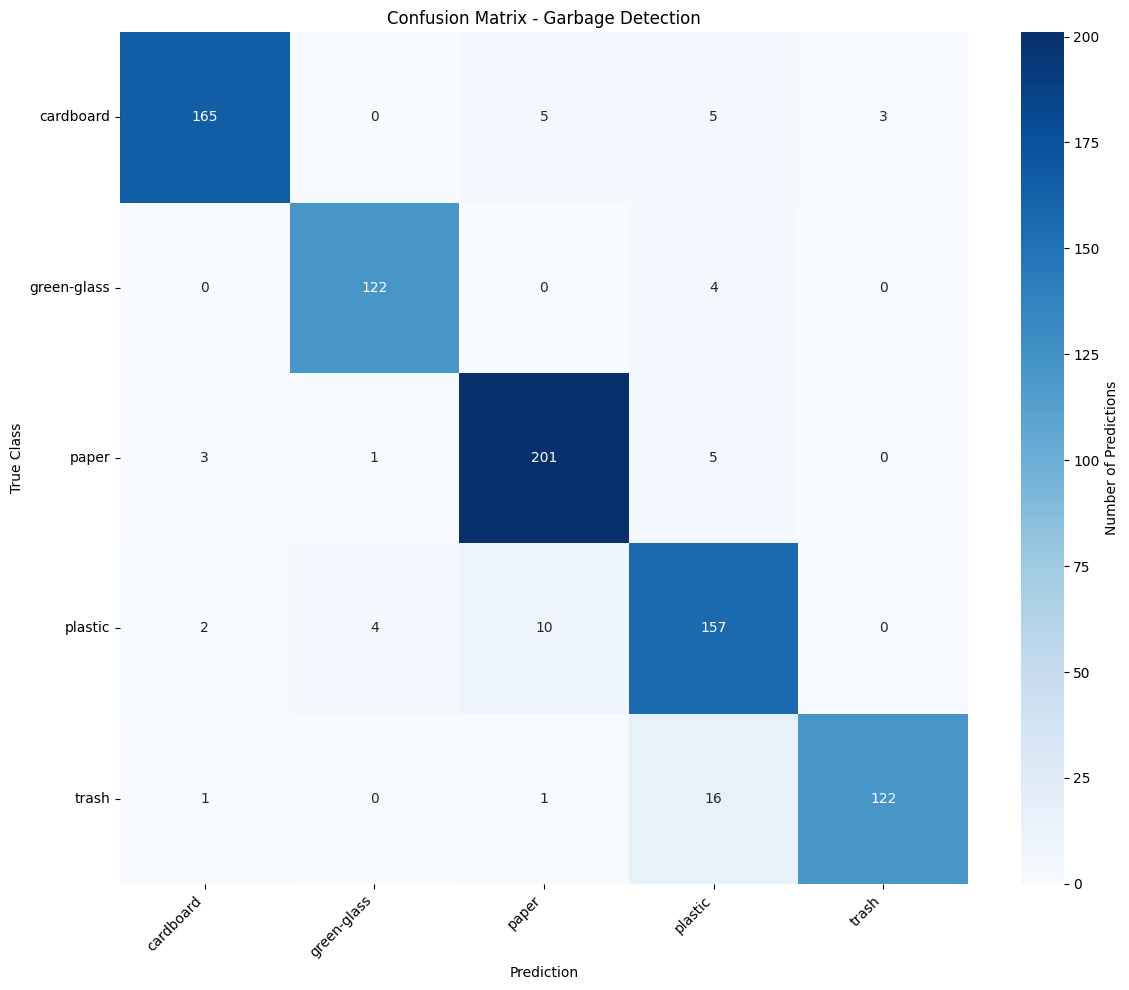


📈 CLASSIFICATION REPORT:
--------------------------------------------------------------------------------
Class                Precision  Recall     F1-Score   Support   
--------------------------------------------------------------------------------
cardboard            0.965      0.927      0.946      178       
green-glass          0.961      0.968      0.964      126       
paper                0.926      0.957      0.941      210       
plastic              0.840      0.908      0.872      173       
trash                0.976      0.871      0.921      140       
--------------------------------------------------------------------------------
Macro Avg            0.933      0.926      0.929      827       

💾 Confusion matrix saved at: yolo11_garbage/results/confusion_matrix.png
💾 Classification report saved at: yolo11_garbage/results/classification_report.json


True

In [ ]:
# Step 12: Confusion matrix
build_confusion_matrix(model_path)

🔍 STEP 13: ERROR ANALYSIS - GARBAGE CLASSIFICATION
🔄 Analyzing 827 predictions...


Analyzing predictions: 100%|██████████| 827/827 [00:13<00:00, 61.31it/s]



📊 ERROR SUMMARY:
   ✅ Correct predictions: 767
   ❌ Errors: 60
   📈 Total predictions: 827
   🎯 Accuracy: 92.7%

🔍 MOST COMMON ERROR TYPES:
   • trash -> plastic: 16 cases (26.7%)
   • plastic -> paper: 10 cases (16.7%)
   • paper -> plastic: 5 cases (8.3%)
   • cardboard -> plastic: 5 cases (8.3%)
   • cardboard -> paper: 5 cases (8.3%)
   • plastic -> green-glass: 4 cases (6.7%)
   • green-glass -> plastic: 4 cases (6.7%)
   • paper -> cardboard: 3 cases (5.0%)
   • cardboard -> trash: 3 cases (5.0%)
   • plastic -> cardboard: 2 cases (3.3%)

📋 ERRORS BY CLASS:
   • trash: 18/140 errors (12.9% error rate)
   • plastic: 16/173 errors (9.2% error rate)
   • cardboard: 13/178 errors (7.3% error rate)
   • paper: 9/210 errors (4.3% error rate)
   • green-glass: 4/126 errors (3.2% error rate)

📈 CONFIDENCE ANALYSIS IN ERRORS:
   • Average confidence in errors: 0.741
   • High confidence errors (>0.7): 38/60 (63.3%)
   • Confidence range: 0.442 - 0.989


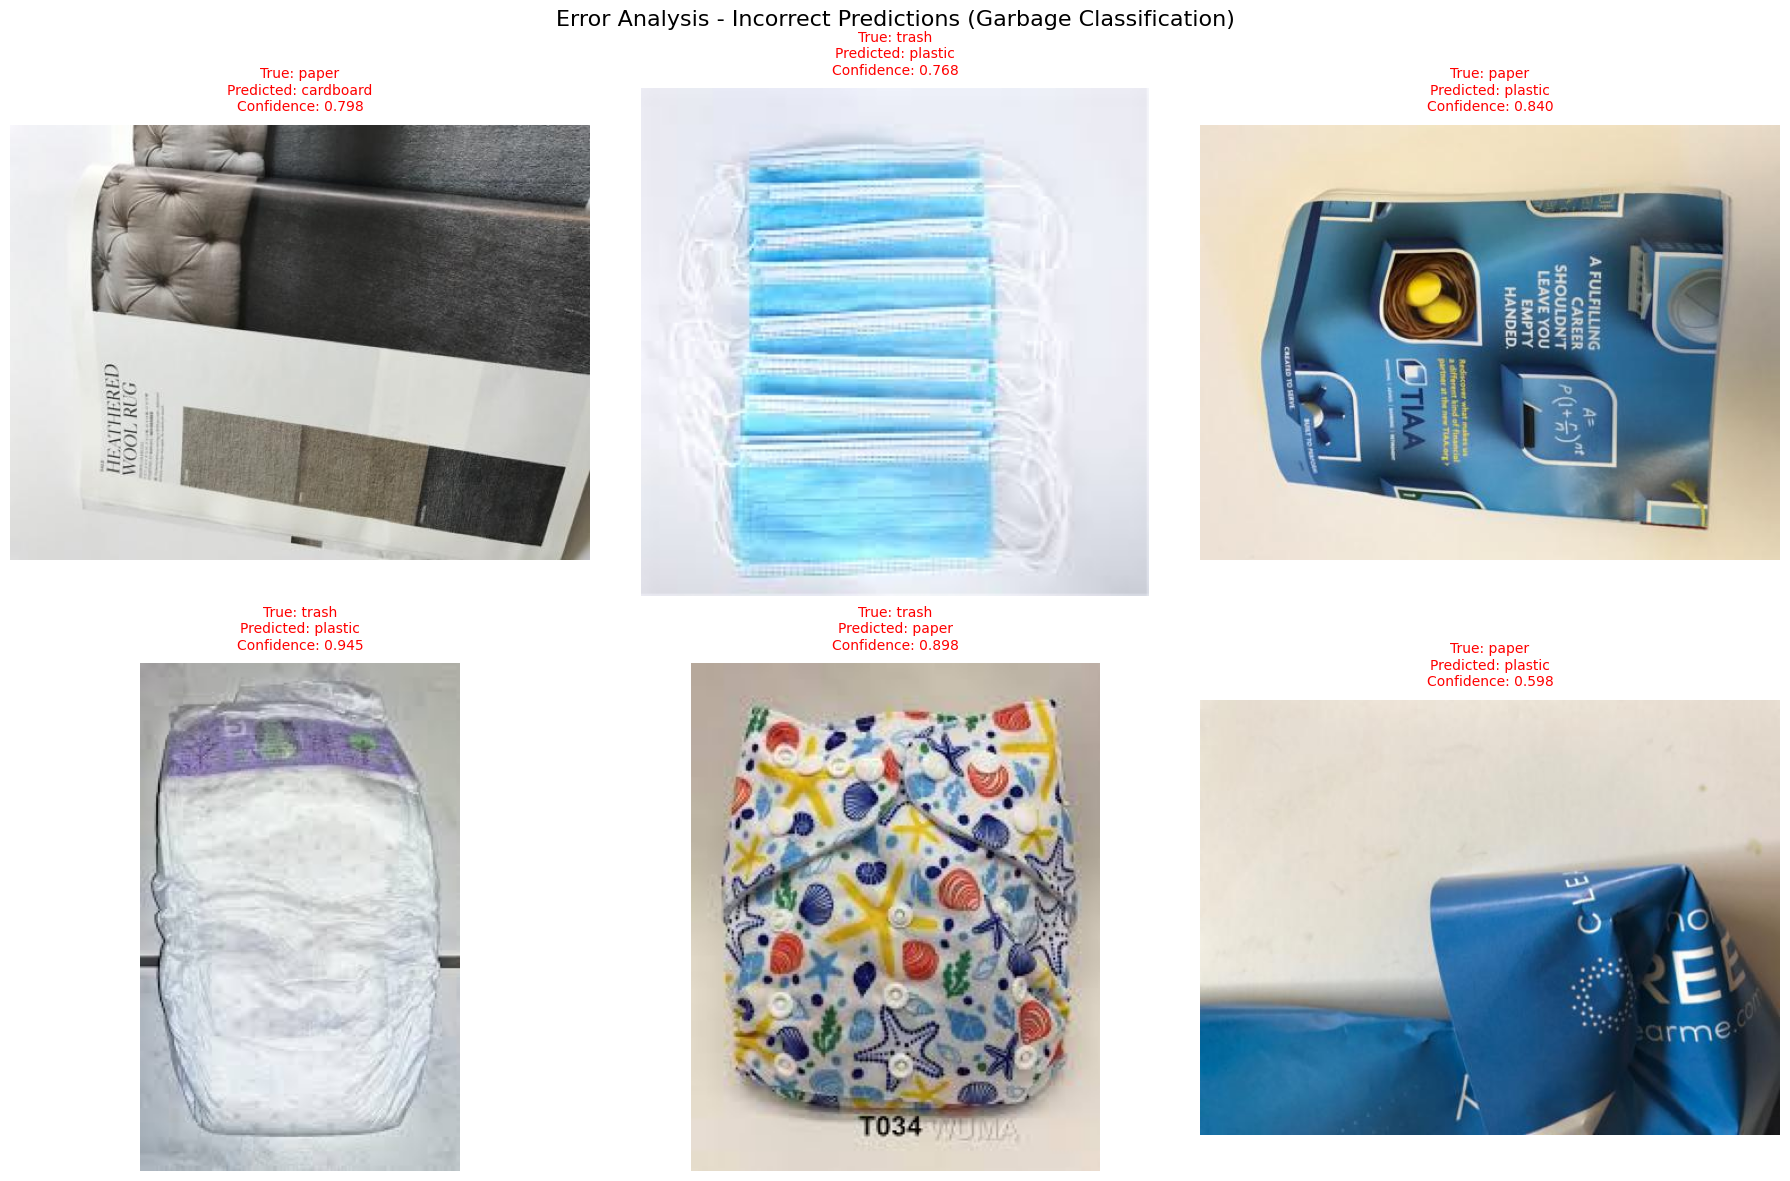

🎨 Error visualization saved at: yolo11_garbage/results/error_analysis_visualization.png

📊 PER-CLASS ACCURACY:
   • cardboard: 165/178 (92.7%)
   • green-glass: 122/126 (96.8%)
   • paper: 201/210 (95.7%)
   • plastic: 157/173 (90.8%)
   • trash: 122/140 (87.1%)

💾 Error analysis saved at: yolo11_garbage/results/error_analysis.json


True

In [ ]:
# Step 13: Error analysis
error_analysis(model_path)

In [ ]:
# Step 14: Final report
final_report()

📋 STEP 14: FINAL REPORT - GARBAGE CLASSIFICATION
⚠️ Could not load final metrics from any location
🎉 GARBAGE CLASSIFICATION PROJECT COMPLETED
📋 Final report generated:
   • Markdown: yolo11_garbage/results/final_report.md
   • JSON: yolo11_garbage/results/final_report.json

🔍 Error analysis:
   • Overall accuracy: 92.7%
   • Total predictions: 827

📊 Dataset summary:
   • Total images: 4,132
   • Classes: 5 garbage categories

📁 All files are located at: yolo11_garbage
🗑️ The garbage classification model is ready to help sort waste!
🌱 Contributing to a cleaner environment through AI! 🌍


True

### 🔄 Option 2: Full Pipeline Execution
Run the entire pipeline automatically by executing the `run_full_pipeline()` function. This will execute all 14 steps sequentially:

```python
# Execute the complete pipeline
run_full_pipeline()
```

In [ ]:
# ============================================================================
# MAIN FUNCTION TO RUN THE ENTIRE PIPELINE
# ============================================================================
def run_full_pipeline():
    """Run the entire training pipeline"""
    print("🚀 STARTING FULL YOLO11 PIPELINE - GARBAGE DETECTION")
    print("=" * 60)

    # Step 1: Initial setup
    if not initial_setup():
        return False

    # Step 2: Download dataset
    dataset_id = "mostafaabla/garbage-classification"
    dataset_path = download_dataset(dataset_id)
    if not dataset_path:
        return False

    # Step 3: Explore dataset
    if not explore_dataset(dataset_path):
        return False

   # Step 4: Prepare data
    target_categories = ['trash', 'plastic', 'green-glass', 'paper', 'cardboard']

    success, train_count, val_count = prepare_data_yolo(dataset_path, target_categories)
    if not success:
        raise Exception("Data preparation failed")

    # Step 5: Create configuration
    config_path = create_config_file()
    if not config_path:
        return False

    # Step 6: Class distribution analysis
    analyze_class_distribution()

    # Step 7: Train model
    model, model_path = train_model(config_path)
    if not model or not model_path:
        raise Exception("Model training failed")

    # Step 8: Visualize training metrics
    visualize_training_metrics()

    # Step 9: Evaluate model
    evaluate_model(model_path, config_path)

    # Step 10: Visualize predictions
    visualize_predictions(model_path)

    # Step 11: Inference demo
    inference_demo(model_path)

    # Step 12: Confusion matrix
    build_confusion_matrix(model_path)

    # Step 13: Error analysis
    error_analysis(model_path)

    # Step 14: Final report
    final_report()

    print("\n🎉 PIPELINE SUCCESSFULLY COMPLETED!")
    print("=" * 60)

    return True

🚀 STARTING FULL YOLO11 PIPELINE - GARBAGE DETECTION
📁 Directories created in: yolo11_garbage
✅ Initial setup completed

📥 STEP 2: DOWNLOAD THE DATASET
🔄 Downloading dataset...
✅ Dataset downloaded to: /kaggle/input/garbage-classification
🔍 STEP 3: DATASET EXPLORATION
📁 Dataset structure at: /kaggle/input/garbage-classification
garbage-classification/
  garbage_classification/
    metal/
      metal375.jpg
      metal561.jpg
      metal341.jpg
      ... and 766 more files
    white-glass/
      white-glass455.jpg
      white-glass64.jpg
      white-glass621.jpg
      ... and 772 more files
    biological/
      biological507.jpg
      biological943.jpg
      biological930.jpg
      ... and 982 more files
    paper/
      paper934.jpg
      paper508.jpg
      paper907.jpg
      ... and 1047 more files
    brown-glass/
      brown-glass577.jpg
      brown-glass13.jpg
      brown-glass148.jpg
      ... and 604 more files
    battery/
      battery161.jpg
      battery361.jpg
      battery4

100%|██████████| 827/827 [00:01<00:00, 541.39it/s]


  ✅ Train: 3305 images processed
  ✅ Val: 827 images processed
  📁 Files created:
    Train: 3305 images, 3305 labels
    Val: 827 images, 827 labels

🔍 Checking labels...
  • Maximum class found in labels: 4
  • Valid classes: 0–4
📝 STEP 5: CREATE YAML CONFIGURATION FILE
✅ Configuration saved at: yolo11_garbage/garbage_config.yaml
  • Number of classes: 5
  • Classes: cardboard, green-glass, paper, plastic, trash
📊 STEP 6: CLASS DISTRIBUTION ANALYSIS


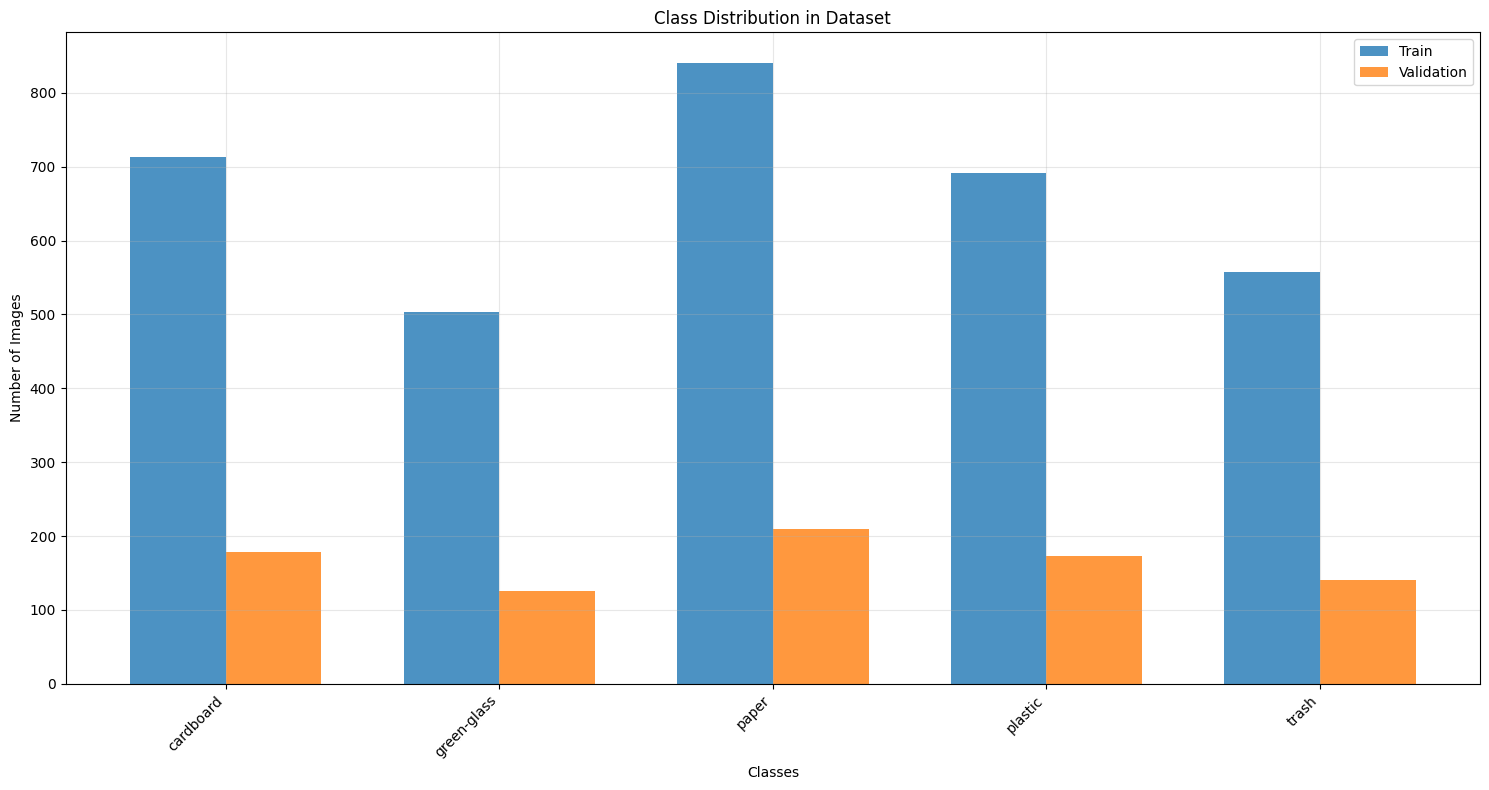

📊 Class distribution plot saved at: yolo11_garbage/results/class_distribution.png
🚀 STEP 7: MODEL TRAINING
🧹 Cleaned previous results.csv
  • Device: cuda
  • GPU: Tesla T4
  • GPU Memory: 14.7 GB
  • Mode: Full training (15 epochs)
  • Batch size: 16
  • Image size: 640px
  • Epochs: 15
🔄 Starting training...
Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo11_garbage/garbage_config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.

train: Scanning /content/yolo11_garbage/dataset/labels/train.cache... 3305 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3305/3305 [00:00<?, ?it/s]

WARNING ⚠️ train: 4.6GB RAM required to cache images with 50% safety margin but only 3.5/12.7GB available, not caching images
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 193.1±116.1 MB/s, size: 17.0 KB)


val: Scanning /content/yolo11_garbage/dataset/labels/val.cache... 827 images, 0 backgrounds, 0 corrupt: 100%|██████████| 827/827 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.7GB RAM): 100%|██████████| 827/827 [00:02<00:00, 317.61it/s]


Plotting labels to yolo11_garbage/garbage_detection/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolo11_garbage/garbage_detection
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.31G      0.342      2.381      1.091         33        640: 100%|██████████| 207/207 [01:08<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.99it/s]

                   all        827        827      0.578      0.779      0.704       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.74G     0.2421       1.24     0.9821         30        640: 100%|██████████| 207/207 [01:05<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]

                   all        827        827      0.552      0.632      0.639      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.74G     0.2893      1.115     0.9965         29        640: 100%|██████████| 207/207 [01:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        827        827       0.63      0.595      0.615      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.74G     0.2998      1.034     0.9952         34        640: 100%|██████████| 207/207 [01:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.75it/s]

                   all        827        827       0.54      0.736      0.684      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.74G     0.2631     0.9563     0.9771         26        640: 100%|██████████| 207/207 [01:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.91it/s]


                   all        827        827      0.671      0.676      0.738      0.685
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.74G      0.173     0.9387     0.9438          9        640: 100%|██████████| 207/207 [01:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.27it/s]


                   all        827        827      0.813      0.677      0.826      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      2.74G     0.1339     0.7508     0.9169          9        640: 100%|██████████| 207/207 [01:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.77it/s]


                   all        827        827      0.762      0.742      0.849      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      2.74G      0.111     0.6659     0.8954          9        640: 100%|██████████| 207/207 [01:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.56it/s]

                   all        827        827       0.78      0.744      0.878      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      2.74G     0.1003     0.5762     0.8886          9        640: 100%|██████████| 207/207 [01:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.13it/s]

                   all        827        827      0.753      0.802      0.894      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.74G    0.08804     0.5545     0.8857          9        640: 100%|██████████| 207/207 [01:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]

                   all        827        827       0.86      0.862      0.935      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      2.74G    0.07372     0.4492     0.8815          9        640: 100%|██████████| 207/207 [00:59<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.22it/s]

                   all        827        827      0.795      0.873       0.93      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.74G    0.06509     0.4297     0.8739          9        640: 100%|██████████| 207/207 [01:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.97it/s]

                   all        827        827      0.913      0.906      0.962      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.74G    0.05781     0.3484     0.8773          9        640: 100%|██████████| 207/207 [00:59<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.66it/s]

                   all        827        827      0.915      0.922      0.975      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.74G    0.04559     0.3162     0.8681          9        640: 100%|██████████| 207/207 [01:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.06it/s]

                   all        827        827       0.93      0.933       0.98       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.74G    0.03797     0.2815     0.8619          9        640: 100%|██████████| 207/207 [01:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.52it/s]

                   all        827        827      0.946      0.943      0.984      0.984



15 epochs completed in 0.291 hours.
Optimizer stripped from yolo11_garbage/garbage_detection/weights/last.pt, 5.4MB
Optimizer stripped from yolo11_garbage/garbage_detection/weights/best.pt, 5.4MB

Validating yolo11_garbage/garbage_detection/weights/best.pt...
Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.93it/s]


                   all        827        827      0.945      0.943      0.984      0.984
             cardboard        178        178      0.938      0.927      0.983      0.983
           green-glass        126        126      0.961      0.986      0.991      0.991
                 paper        210        210      0.921      0.957      0.985      0.985
               plastic        173        173      0.919      0.908      0.973      0.973
                 trash        140        140      0.985       0.94      0.988      0.988
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Saving yolo11_garbage/garbage_detection/predictions.json...
Results saved to yolo11_garbage/garbage_detection
✅ Training complete! Model saved at: yolo11_garbage/garbage_detection/weights/best.pt
📈 STEP 8: VISUALIZE TRAINING METRICS


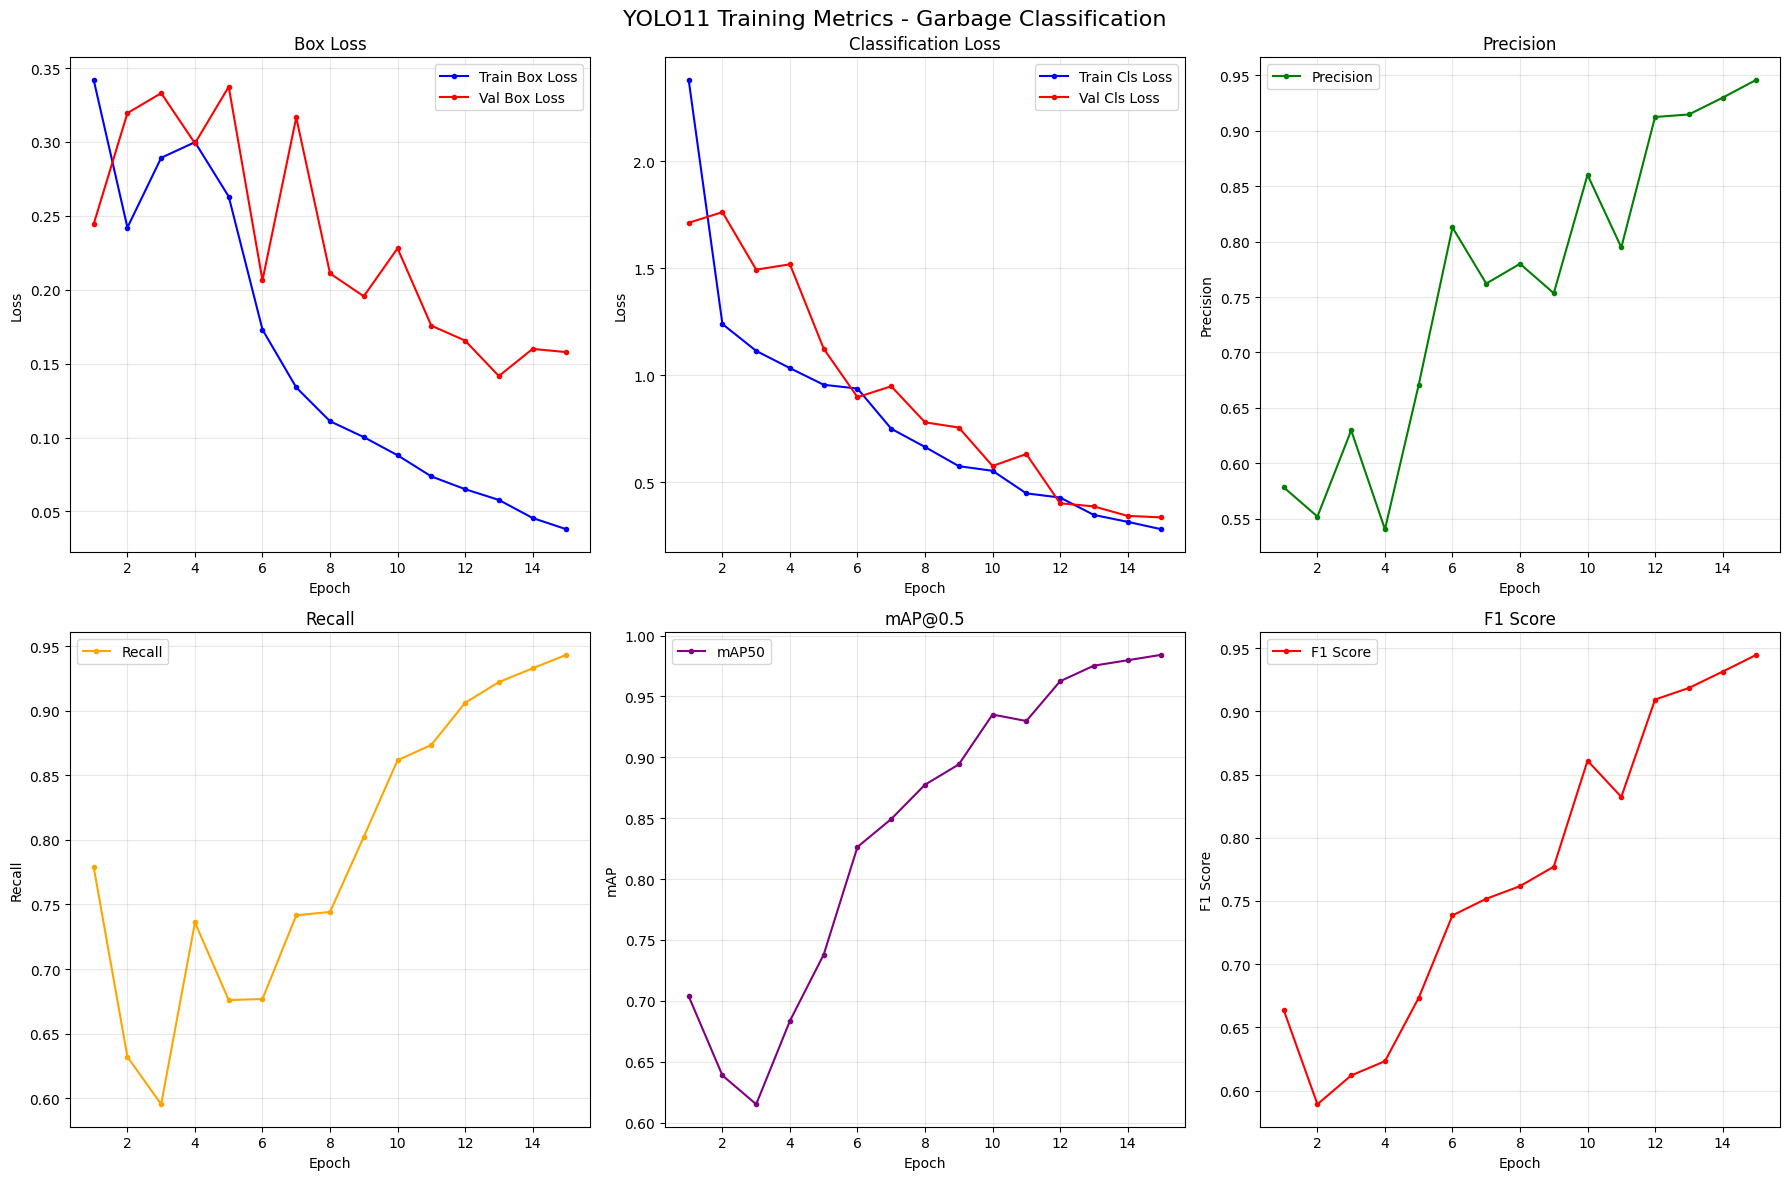

📊 Metric plots saved at: yolo11_garbage/results/training_metrics.png

📈 Final metrics (Epoch 15):
  • Precision: 0.9461
  • Recall: 0.9433
  • mAP50: 0.9842
  • mAP50-95: 0.9840
🔍 STEP 9: MODEL EVALUATION
Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.9±6.8 MB/s, size: 11.5 KB)


val: Scanning /content/yolo11_garbage/dataset/labels/val.cache... 827 images, 0 backgrounds, 0 corrupt: 100%|██████████| 827/827 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:11<00:00,  4.40it/s]


                   all        827        827      0.945       0.94      0.984      0.984
             cardboard        178        178      0.939      0.927      0.983      0.983
           green-glass        126        126      0.961      0.985      0.991      0.991
                 paper        210        210      0.922      0.957      0.985      0.985
               plastic        173        173      0.919      0.908      0.973      0.973
                 trash        140        140      0.985      0.925      0.989      0.988
Speed: 0.5ms preprocess, 4.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Saving runs/detect/val2/predictions.json...
Results saved to runs/detect/val2
📊 Evaluation results:
  • mAP50: 0.9843
  • mAP50-95: 0.9840
  • Precision: 0.9450
  • Recall: 0.9403
🎨 STEP 10: PREDICTION VISUALIZATION


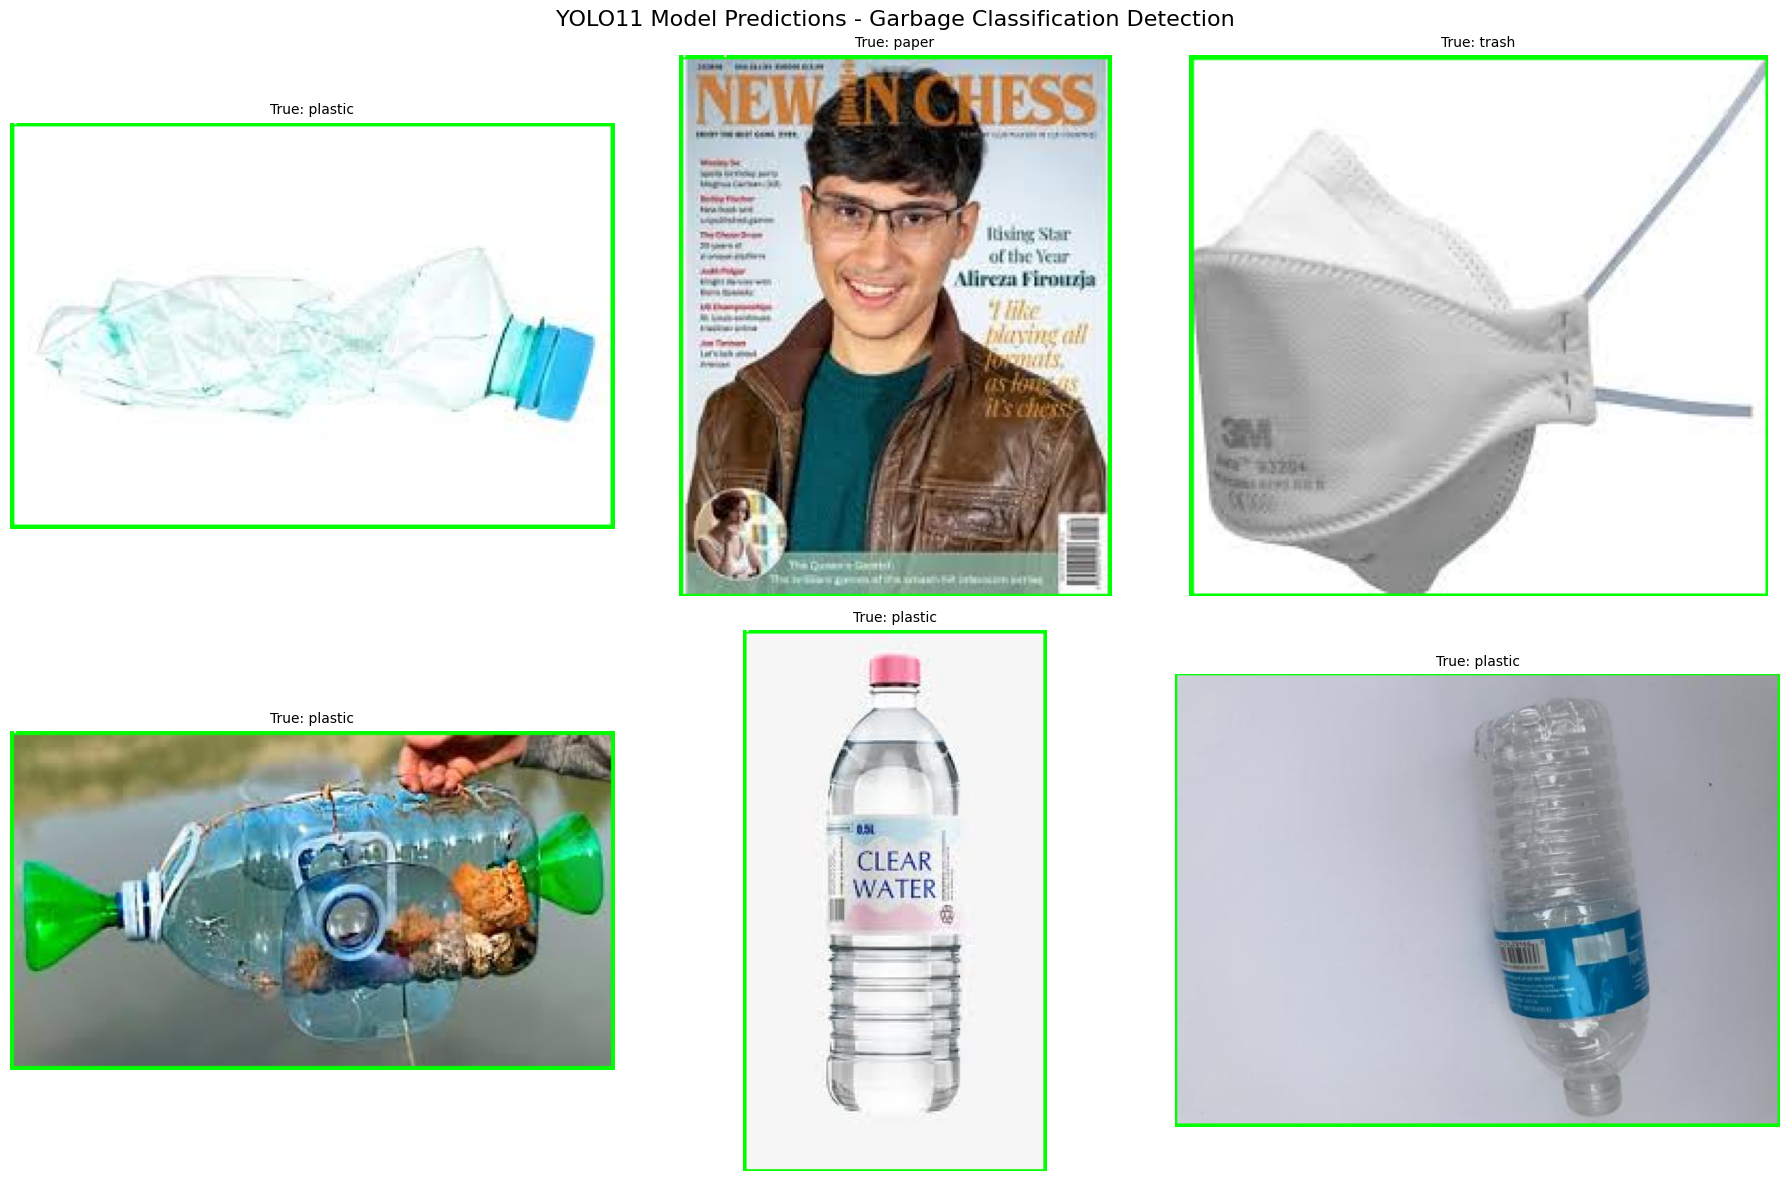

🎨 Visualizations saved to: yolo11_garbage/results/predictions_visualization.png
🎯 STEP 11: INFERENCE DEMONSTRATION
🖼️  Processing 10 sample images...

🖼️  Image 1: plastic_plastic744.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.980)
   📊 Status: ✅ CORRECT

🖼️  Image 2: paper_paper885.jpg
   📋 True class: paper
   🎯 Prediction: paper (confidence: 0.997)
   📊 Status: ✅ CORRECT

🖼️  Image 3: trash_trash104.jpg
   📋 True class: trash
   🎯 Prediction: trash (confidence: 0.964)
   📊 Status: ✅ CORRECT

🖼️  Image 4: plastic_plastic688.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.665)
   📊 Status: ✅ CORRECT

🖼️  Image 5: plastic_plastic591.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.994)
   📊 Status: ✅ CORRECT

🖼️  Image 6: plastic_plastic218.jpg
   📋 True class: plastic
   🎯 Prediction: plastic (confidence: 0.994)
   📊 Status: ✅ CORRECT

🖼️  Image 7: plastic_plastic403.jpg
   📋 True class: plastic
   🎯 Prediction: plastic

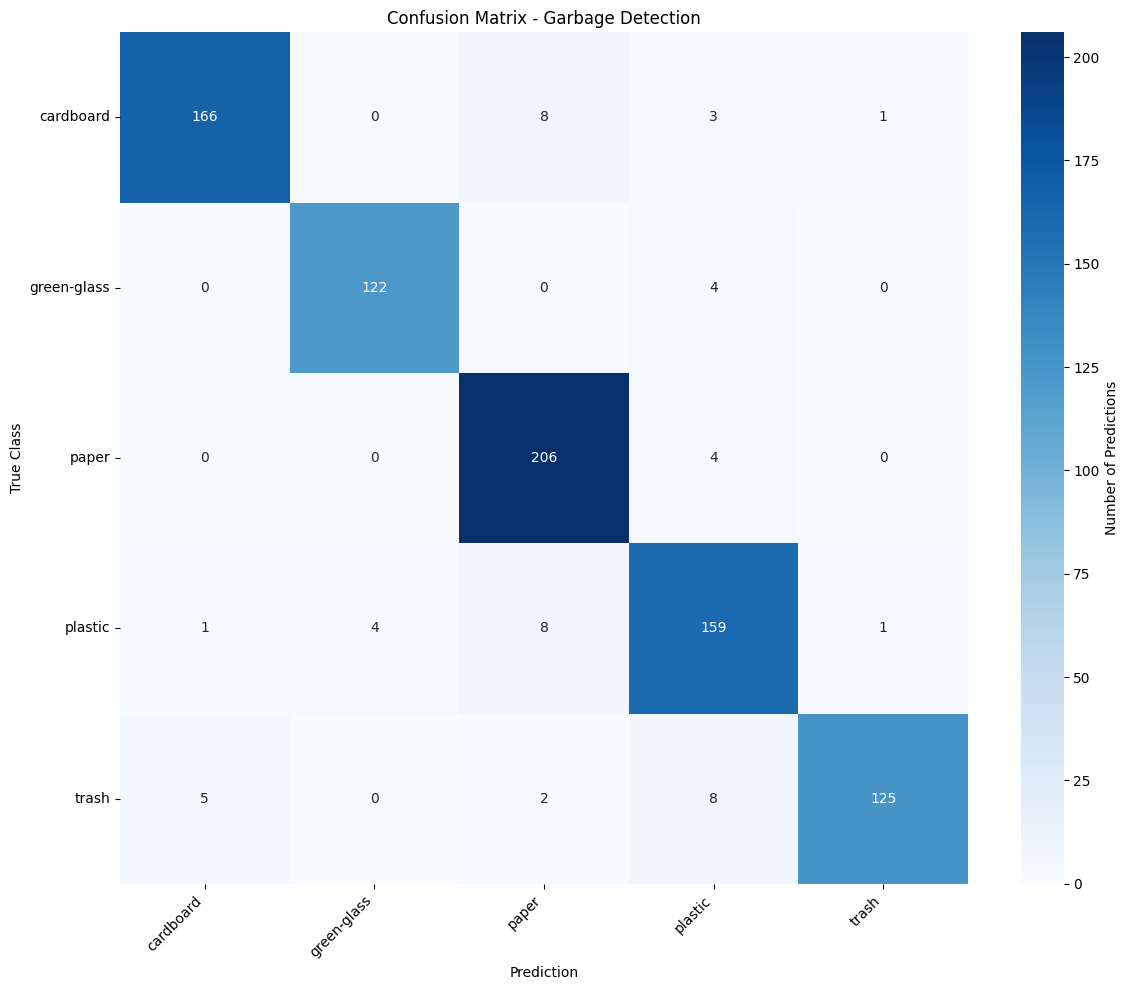


📈 CLASSIFICATION REPORT:
--------------------------------------------------------------------------------
Class                Precision  Recall     F1-Score   Support   
--------------------------------------------------------------------------------
cardboard            0.965      0.933      0.949      178       
green-glass          0.968      0.968      0.968      126       
paper                0.920      0.981      0.949      210       
plastic              0.893      0.919      0.906      173       
trash                0.984      0.893      0.936      140       
--------------------------------------------------------------------------------
Macro Avg            0.946      0.939      0.942      827       

💾 Confusion matrix saved at: yolo11_garbage/results/confusion_matrix.png
💾 Classification report saved at: yolo11_garbage/results/classification_report.json
🔍 STEP 13: ERROR ANALYSIS - GARBAGE CLASSIFICATION
🔄 Analyzing 827 predictions...


Analyzing predictions: 100%|██████████| 827/827 [00:14<00:00, 55.39it/s]



📊 ERROR SUMMARY:
   ✅ Correct predictions: 778
   ❌ Errors: 49
   📈 Total predictions: 827
   🎯 Accuracy: 94.1%

🔍 MOST COMMON ERROR TYPES:
   • cardboard -> paper: 8 cases (16.3%)
   • trash -> plastic: 8 cases (16.3%)
   • plastic -> paper: 8 cases (16.3%)
   • trash -> cardboard: 5 cases (10.2%)
   • paper -> plastic: 4 cases (8.2%)
   • plastic -> green-glass: 4 cases (8.2%)
   • green-glass -> plastic: 4 cases (8.2%)
   • cardboard -> plastic: 3 cases (6.1%)
   • trash -> paper: 2 cases (4.1%)
   • plastic -> trash: 1 cases (2.0%)

📋 ERRORS BY CLASS:
   • trash: 15/140 errors (10.7% error rate)
   • plastic: 14/173 errors (8.1% error rate)
   • cardboard: 12/178 errors (6.7% error rate)
   • paper: 4/210 errors (1.9% error rate)
   • green-glass: 4/126 errors (3.2% error rate)

📈 CONFIDENCE ANALYSIS IN ERRORS:
   • Average confidence in errors: 0.774
   • High confidence errors (>0.7): 34/49 (69.4%)
   • Confidence range: 0.327 - 0.982


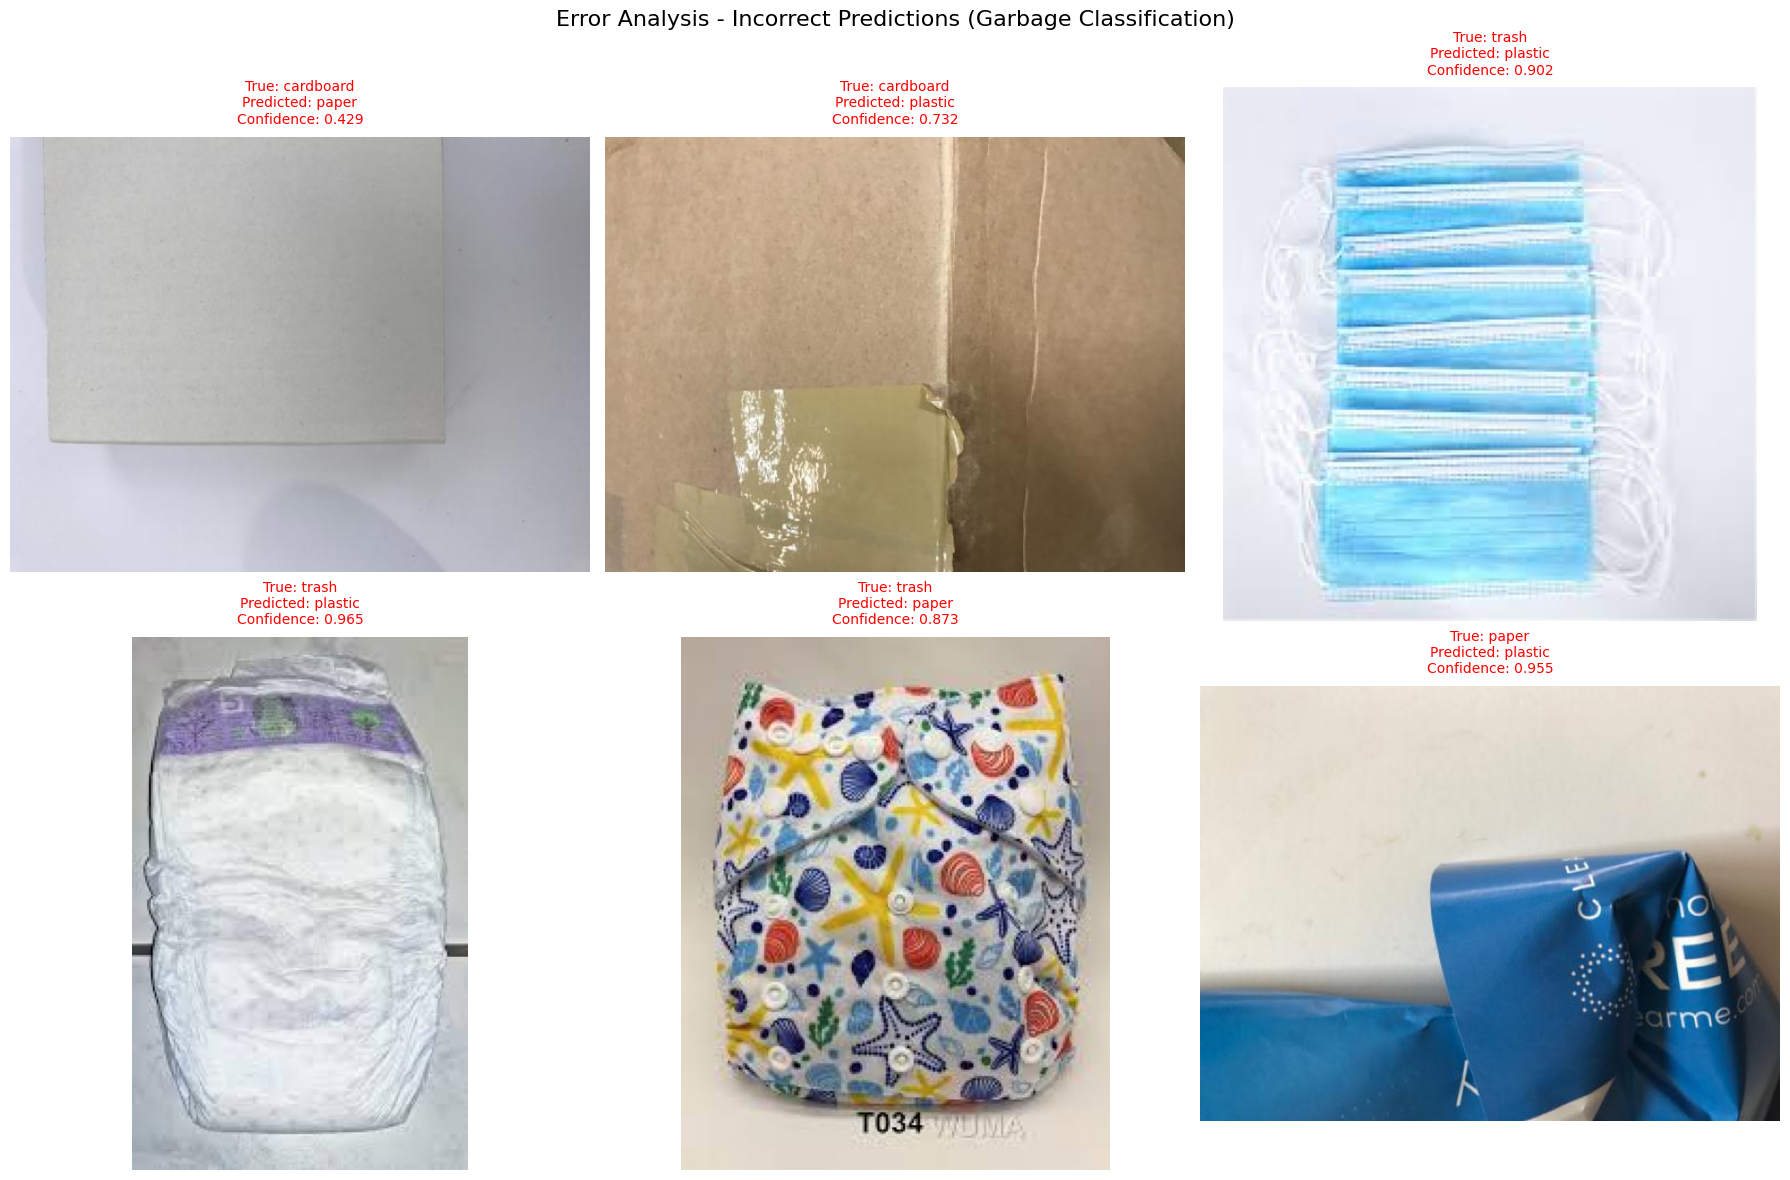

🎨 Error visualization saved at: yolo11_garbage/results/error_analysis_visualization.png

📊 PER-CLASS ACCURACY:
   • cardboard: 166/178 (93.3%)
   • green-glass: 122/126 (96.8%)
   • paper: 206/210 (98.1%)
   • plastic: 159/173 (91.9%)
   • trash: 125/140 (89.3%)

💾 Error analysis saved at: yolo11_garbage/results/error_analysis.json
📋 STEP 14: FINAL REPORT - GARBAGE CLASSIFICATION
⚠️ Could not load final metrics from any location
🎉 GARBAGE CLASSIFICATION PROJECT COMPLETED
📋 Final report generated:
   • Markdown: yolo11_garbage/results/final_report.md
   • JSON: yolo11_garbage/results/final_report.json

🔍 Error analysis:
   • Overall accuracy: 94.1%
   • Total predictions: 827

📊 Dataset summary:
   • Total images: 4,132
   • Classes: 5 garbage categories

📁 All files are located at: yolo11_garbage
🗑️ The garbage classification model is ready to help sort waste!
🌱 Contributing to a cleaner environment through AI! 🌍

🎉 PIPELINE SUCCESSFULLY COMPLETED!


True

In [ ]:
# Run the full pipeline
run_full_pipeline()

## 🏗️ Project Structure

After running the complete pipeline, your project structure will look like:

```
yolo11_garbage/
├── dataset/
│   ├── images/
│   │   ├── train/          # Training images
│   │   └── val/            # Validation images
│   └── labels/
│       ├── train/          # Training annotations
│       └── val/            # Validation annotations
├── garbage_detection/        # YOLO training outputs
│   ├── weights/
│   │   ├── best.pt         # Best model weights
│   │   └── last.pt         # Latest model weights
│   └── results.csv         # Training metrics
├── results/                # Analysis results
│   ├── class_distribution.png
│   ├── training_metrics.png
│   ├── predictions_visualization.png
│   ├── confusion_matrix.png
│   ├── error_analysis_visualization.png
│   ├── classification_report.json
│   ├── error_analysis.json
│   ├── inference_demo_results.csv
│   ├── reporte_final.md
│   └── reporte_final.json
└── garbage_config.yaml       # YOLO configuration
```

## 📊 Results and Metrics

The pipeline generates comprehensive metrics including:

- **mAP@0.5:** Mean Average Precision at IoU 0.5
- **mAP@0.5:0.95:** Mean Average Precision across multiple IoU thresholds
- **Precision/Recall:** Per-class and overall metrics
- **F1-Score:** Harmonic mean of precision and recall
- **Confusion Matrix:** Detailed classification performance
- **Error Analysis:** Common failure patterns and insights